# Global Terrorism exploration and  success prediction APP 

 ![](dataset-cover.png)

## Project Goals

The goal of the project is to understand more about the global terrorism, using an exploration app in streamlit that allow to understand better the terrorism activity in each country: showing the terrorist groups, attacks, more dangerous cities, most frequent acts of terror, main targets. Also in the exploration app, we will be able to know if the country is in a trend according to the region (Regional Problem) or in contrary, if the country has a local problem, out of the behaivour of its region.

Having a good approach of the country situation with regards to terrorist activity, we will include the feature to predict if a terrorist attack would be successfull or not, using a machine learning clasification algorithm that would be trained using all the relevant historical data that we have in our dataset.

This Notebook is to explore the data, process and clean it to feed the app, and to document the steps followed to choose between a Random Forest and Decision Tree clasification algorithm to predict the success or fail of the act of terror.

## Target Audience

The target audicence of this report and the app would be anyone who wants to explore in an userfriendly way the Global terrorism dataset, to understand the situation o any specific country and region and to predict if a terrorist attack in a country could be successful or not.

## Dataset

As we mentioned above, for this project, we will use the Global Terrorism Dataset, the most updated version that contains data between 1970 to 2019. In kaggle there is a version of the database till 2017 that could be used with this code.

The Global Terrorism Database (GTD) documents more than 200,000 international and domestic terrorist attacks that occurred worldwide since 1970. With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. Data collection is ongoing and updates are published annually at www.start.umd.edu/gtd.


## Importing Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

pd.options.mode.chained_assignment = None 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing data

In [2]:
df = pd.read_excel("globalterrorismdb_0221dist.xlsx")

### Identifying Missing Values

Before performing any data transformations, we begin by analyzing the dataset to identify the extent of missing values. This step is very important to understand the quality and completeness of the data, and to inform our decisions on how to handle missing entries.

The following step calculate the number of missingvalues for each column in the dataset using, this will help us to visualice critical columns with a high proportion of missing data and to decide if we need to drop, impute, or just ignore specific fields.

In [3]:
##Starting the dataset analysis, we would check which columns have data missing
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            189429
extended                   0
resolution            196515
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                  0
city                     427
latitude                4627
longitude               4628
specificity                1
vicinity                   0
location              137414
summary                66121
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           168064
alternative_txt       168064
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           193485
attacktype2_txt       193485
attacktype3           200613
attacktype3_txt       200613
targtype1     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 207.2+ MB


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Na

## Data Cleaning

We will clean the dataset and choose the variables that have a big amount of data not null, and the ones that will be usefull for our report.

In [6]:
df = df[['iyear','imonth','iday','country_txt','country','region_txt',
         'region','provstate','city',
         'latitude', 'longitude','suicide', 'attacktype1_txt',
         'attacktype1', 'targtype1_txt', 'targtype1',
         'gname', 'weaptype1_txt','weaptype1',
         'nkill','nwound','success','eventid','natlty1',"natlty1_txt","extended","specificity","vicinity","crit1"]]

In [7]:
df.head()

,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,National,Santo Domingo,18.456792,-69.951164,0,Assassination,1,Private Citizens & Property,14,MANO-D,Unknown,13,1.0,0.0,1,197000000001,58.0,Dominican Republic,0,1.0,0,1
1,1970,0,0,Mexico,130,North America,1,Federal,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,23rd of September Communist League,Unknown,13,0.0,0.0,1,197000000002,21.0,Belgium,0,1.0,0,1
2,1970,1,0,Philippines,160,Southeast Asia,5,Tarlac,Unknown,15.478598,120.599741,0,Assassination,1,Journalists & Media,10,Unknown,Unknown,13,1.0,0.0,1,197001000001,217.0,United States,0,4.0,0,1
3,1970,1,0,Greece,78,Western Europe,8,Attica,Athens,37.997490,23.762728,0,Bombing/Explosion,3,Government (Diplomatic),7,Unknown,Explosives,6,NaN,NaN,1,197001000002,217.0,United States,0,1.0,0,1
4,1970,1,0,Japan,101,East Asia,4,Fukouka,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,7,Government (Diplomatic),7,Unknown,Incendiary,8,NaN,NaN,1,197001000003,217.0,United States,0,1.0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            201183 non-null  int64  
 1   imonth           201183 non-null  int64  
 2   iday             201183 non-null  int64  
 3   country_txt      201183 non-null  object 
 4   country          201183 non-null  int64  
 5   region_txt       201183 non-null  object 
 6   region           201183 non-null  int64  
 7   provstate        201183 non-null  object 
 8   city             200756 non-null  object 
 9   latitude         196556 non-null  float64
 10  longitude        196555 non-null  float64
 11  suicide          201183 non-null  int64  
 12  attacktype1_txt  201183 non-null  object 
 13  attacktype1      201183 non-null  int64  
 14  targtype1_txt    201183 non-null  object 
 15  targtype1        201183 non-null  int64  
 16  gname            201183 non-null  obje

We will re-run df.isnull().sum() to verify the current state of missing values in the dataset. This check will allow us to identify any remaining missing values that still need to be handled and prioritize columns that may still require attention before model training.

In [9]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
country                0
region_txt             0
region                 0
provstate              0
city                 427
latitude            4627
longitude           4628
suicide                0
attacktype1_txt        0
attacktype1            0
targtype1_txt          0
targtype1              0
gname                  0
weaptype1_txt          0
weaptype1              0
nkill              11950
nwound             18924
success                0
eventid                0
natlty1             1850
natlty1_txt         1850
extended               0
specificity            1
vicinity               0
crit1                  0
dtype: int64

As we saw before there are some records containing 0 for example in the iday column (day of the month), which is used to indicate that the specific day is unknown. As the value of 0 is not a valid day, we will amend it by replacing it with a random ingteger between 1 and 28 (to be this step compatible with February)

This approach preserves data quantity and temporal consistency for downstream analysis.

In [10]:
## We will proceed managing the missing data in column iday, using replace by a random number
df['iday'].value_counts()
df['iday'] = df['iday'].apply(lambda x: np.random.randint(1, 29) if x == 0 else x)
df['iday'].value_counts()

iday
15    7200
1     7003
4     6848
16    6771
10    6763
9     6756
28    6737
12    6731
14    6713
7     6694
13    6693
11    6666
3     6657
20    6653
27    6623
19    6615
2     6595
25    6591
5     6566
17    6548
18    6534
8     6506
21    6471
22    6452
26    6439
23    6415
6     6398
24    6398
29    6059
30    5648
31    3440
Name: count, dtype: int64

We will do exactly the same with the column imonth for values = 0, Since 0 is not a valid calendar month, we will replace it with a random value between 1 and 12. Despite of this introduces a degree of uncertainty, it's a practical trade-off to preserve data quantity and enable meaningful exploratory and predictive analysis.

In [11]:
## We will proceed managing the missing data in column iday, using replace by a random number
df['imonth'].value_counts()
df['imonth'] = df['imonth'].apply(lambda x: np.random.randint(1, 13) if x == 0 else x)
df['imonth'].value_counts()

imonth
5     18905
7     18038
8     17295
10    17167
6     17070
3     16907
4     16836
1     16654
11    16258
9     15686
2     15427
12    14940
Name: count, dtype: int64

In [12]:
## We will create a new column called date
df2 = df[["iyear", "imonth", "iday"]].copy()
df2.columns = ["year", "month", "day"]
pd.to_datetime(df2)
df["idate"] = pd.to_datetime(df2)
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1
0,1970-07-02,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,National,Santo Domingo,18.456792,-69.951164,0,Assassination,1,Private Citizens & Property,14,MANO-D,Unknown,13,1.0,0.0,1,197000000001,58.0,Dominican Republic,0,1.0,0,1
1,1970-11-27,1970,11,27,Mexico,130,North America,1,Federal,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,23rd of September Communist League,Unknown,13,0.0,0.0,1,197000000002,21.0,Belgium,0,1.0,0,1
2,1970-01-22,1970,1,22,Philippines,160,Southeast Asia,5,Tarlac,Unknown,15.478598,120.599741,0,Assassination,1,Journalists & Media,10,Unknown,Unknown,13,1.0,0.0,1,197001000001,217.0,United States,0,4.0,0,1
3,1970-01-18,1970,1,18,Greece,78,Western Europe,8,Attica,Athens,37.997490,23.762728,0,Bombing/Explosion,3,Government (Diplomatic),7,Unknown,Explosives,6,NaN,NaN,1,197001000002,217.0,United States,0,1.0,0,1
4,1970-01-28,1970,1,28,Japan,101,East Asia,4,Fukouka,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,7,Government (Diplomatic),7,Unknown,Incendiary,8,NaN,NaN,1,197001000003,217.0,United States,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,2019-12-31,2019,12,31,Iraq,95,Middle East & North Africa,10,Baghdad,Baghdad,33.303567,44.371771,0,Bombing/Explosion,3,Private Citizens & Property,14,Unknown,Explosives,6,0.0,0.0,1,201912310028,95.0,Iraq,0,1.0,0,1
201179,2019-12-31,2019,12,31,Sudan,195,Sub-Saharan Africa,11,West Darfur,El Geneina,13.440886,22.441728,0,Unknown,9,Police,3,Unknown,Unknown,13,2.0,1.0,1,201912310030,195.0,Sudan,0,1.0,0,1
201180,2019-12-31,2019,12,31,Sudan,195,Sub-Saharan Africa,11,West Darfur,El Geneina,13.440886,22.441728,0,Armed Assault,2,Government (General),2,Unknown,Firearms,5,2.0,0.0,1,201912310031,195.0,Sudan,0,1.0,0,1
201181,2019-12-31,2019,12,31,India,92,South Asia,6,Jammu and Kashmir,Bagiot Dora,33.812790,74.097730,0,Bombing/Explosion,3,Private Citizens & Property,14,Unknown,Explosives,6,0.0,1.0,1,201912310032,92.0,India,0,1.0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            201183 non-null  datetime64[ns]
 1   iyear            201183 non-null  int64         
 2   imonth           201183 non-null  int64         
 3   iday             201183 non-null  int64         
 4   country_txt      201183 non-null  object        
 5   country          201183 non-null  int64         
 6   region_txt       201183 non-null  object        
 7   region           201183 non-null  int64         
 8   provstate        201183 non-null  object        
 9   city             200756 non-null  object        
 10  latitude         196556 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          201183 non-null  int64         
 13  attacktype1_txt  201183 non-null  object        
 14  attacktype1      201

nkill and nwound columns represent the number of fatalities and wounded individuals in each terrorist attack, respectively. As we can see above both columns contain some missing values. Instead of removing those records, we choose to impute the missing values with the **mean** of each column. We will do this basically, because both columns are critical for our analysis and prediction, and removing the rows will reduce significantly the size of the dataset, despite of this action may slighly affect to the distribution it will mantain the scale and prevent the loss of data. We could explore using Median instead in future projects.


In [14]:
## As we see there are missing values in columns nkill nwound, as the amount of
## missing values are more than 8%, we could not proceed removing those rows with mising values in both columns 
## so we will substitute those values with a average data so we will not affect to our training data

df['nkill'].fillna((df['nkill'].mean()), inplace=True)
df['nwound'].fillna((df['nwound'].mean()), inplace=True)

C:\Users\APC\AppData\Local\Temp\ipykernel_4896\3240786605.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\APC\AppData\Local\Temp\ipykernel_4896\3240786605.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

After imputing missing values, we will convert the nkill and nwound columns from float to int, because both columns represent number of people which are always whole numbers, and this action as well will improve the consistency in the analysis and training the models.


In [15]:
df["nkill"] = df["nkill"].astype(int)
df["nwound"] = df["nwound"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            201183 non-null  datetime64[ns]
 1   iyear            201183 non-null  int64         
 2   imonth           201183 non-null  int64         
 3   iday             201183 non-null  int64         
 4   country_txt      201183 non-null  object        
 5   country          201183 non-null  int64         
 6   region_txt       201183 non-null  object        
 7   region           201183 non-null  int64         
 8   provstate        201183 non-null  object        
 9   city             200756 non-null  object        
 10  latitude         196556 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          201183 non-null  int64         
 13  attacktype1_txt  201183 non-null  object        
 14  attacktype1      201

In [16]:
## We will proceed exporting the data to a csv.
df.to_csv("Terrorism_preprocessed.csv",index=False)

Geographic information longitude and latitude is essential for many parts of this analysis, especially for mapping and regional modeling. In this step, we will remove rows where longitude is missing. This will ensure the data integrity of all spatial analyses and maps


In [17]:
#With regards to the rows with no information in latitude and longitud, there are 4627 rows over 201183, this means a 2.18% or our data set.
#We will proceed removing the rows with this information empty
df = df.dropna(subset=['longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196555 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            196555 non-null  datetime64[ns]
 1   iyear            196555 non-null  int64         
 2   imonth           196555 non-null  int64         
 3   iday             196555 non-null  int64         
 4   country_txt      196555 non-null  object        
 5   country          196555 non-null  int64         
 6   region_txt       196555 non-null  object        
 7   region           196555 non-null  int64         
 8   provstate        196555 non-null  object        
 9   city             196135 non-null  object        
 10  latitude         196555 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          196555 non-null  int64         
 13  attacktype1_txt  196555 non-null  object        
 14  attacktype1      196555 n

To further assess the dataset's completeness, we check for missing values in `provstate` and `city`, which provide more granular geographic detail than latitude and longitude.

In [18]:
df2 = df[df["provstate"].isnull()]
df2[df2["city"].isnull()]

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1


In [19]:
df3 = df[df["city"].isnull()]
df3[df3["provstate"].isnull()]

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1


In [20]:
##this means: when the city is non value the provstate has value and the contrary also happens, so no cleaning is need it

In [21]:
df.to_csv("Terrorism_clean_dataset.csv",index=False)

## Exploring data

Before moving to the predictive part, it is essential have a deep understanding of the data. For this reason, in this section we will explore the data  to identify trends, detect patterns, and understand how the variables are distributed.

In the context of global terrorism, this step is very important; by using various visualizations, we will be able to analyze how terrorist attacks have evolved over time, identify which are the most affected countries and regions, understand which types of attacks are more common, and explore the activity of different terrorist groups.

This exploratory step will be as well very important for making informed decisions regarding feature selection and model design. For example, will help us to detect imbalances in the target variable (success), observe meaningful relationships between features, and confirm the relevance of several attributes that we will use later in the machine learning model.


### Visualization of outliers 

An outlier is a data point that lies outside the overall pattern in a distribution. A commonly used rule says that a data point is an outlier if it is more than 1.5 IQR above the third quartile or below the first quartile. Said differently, low outliers are below Q1 -1.5 * IQR  and high outliers are above Q3 +1.5 IQR


We will use a boxplot to visually confirm the presence of outliers in the number of people killed (nkill) and wounded (nwound). The plot highlights the distribution of values and the presence of extreme points far from the median. 


<Axes: >

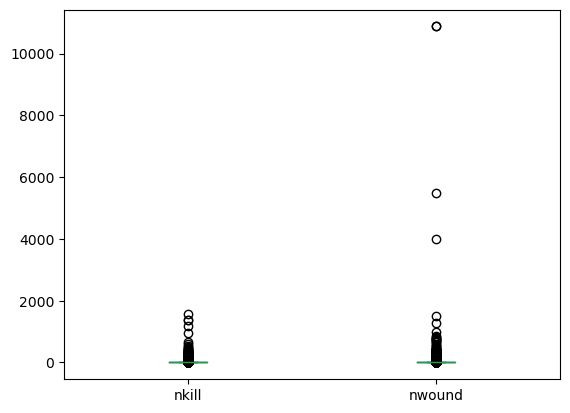

In [22]:
df[['nkill', 'nwound']].plot.box()

In [23]:
# Looking for outliers
df[['nkill', 'nwound']].describe()

,nkill,nwound
count,196555.000000,196555.000000
mean,2.352156,3.136674
std,10.857536,40.164057
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,3.000000
max,1570.000000,10878.000000


As we can see above, there is presence of extreme values, the maximum number of fatalities in a single attack is 1,570, while the maximum number of wounded reaches 10,878. On the other hand, the 75th percentile for both variables remains relatively low 2 for nkill, 3 for nwound), indicating that most attacks result in a small number of casualties. This suggests a highly skewed distribution, where a few mass-casualty events significantly distort the mean and standard deviation. We will keep this skewness in mind when choosing metrics and models, especially those sensitive to scale or distribution.

## Trend analysis

To understad how the terrorism has evolved during the time is essential to contextualize the severity and dynamics of the problem. 

By analyzing the number of attacks per year, we will be able to identify historical periods of escalation or decline, detect new waves of violence, and associate peaks in activity with specific geopolitical or regional conflicts.

With this analysis we will have an overall view on how the phenomenon has changed across decades, and we will be able to validate which years or periods deserve special attention in modeling or visualization. 

Text(0, 0.5, 'Count')

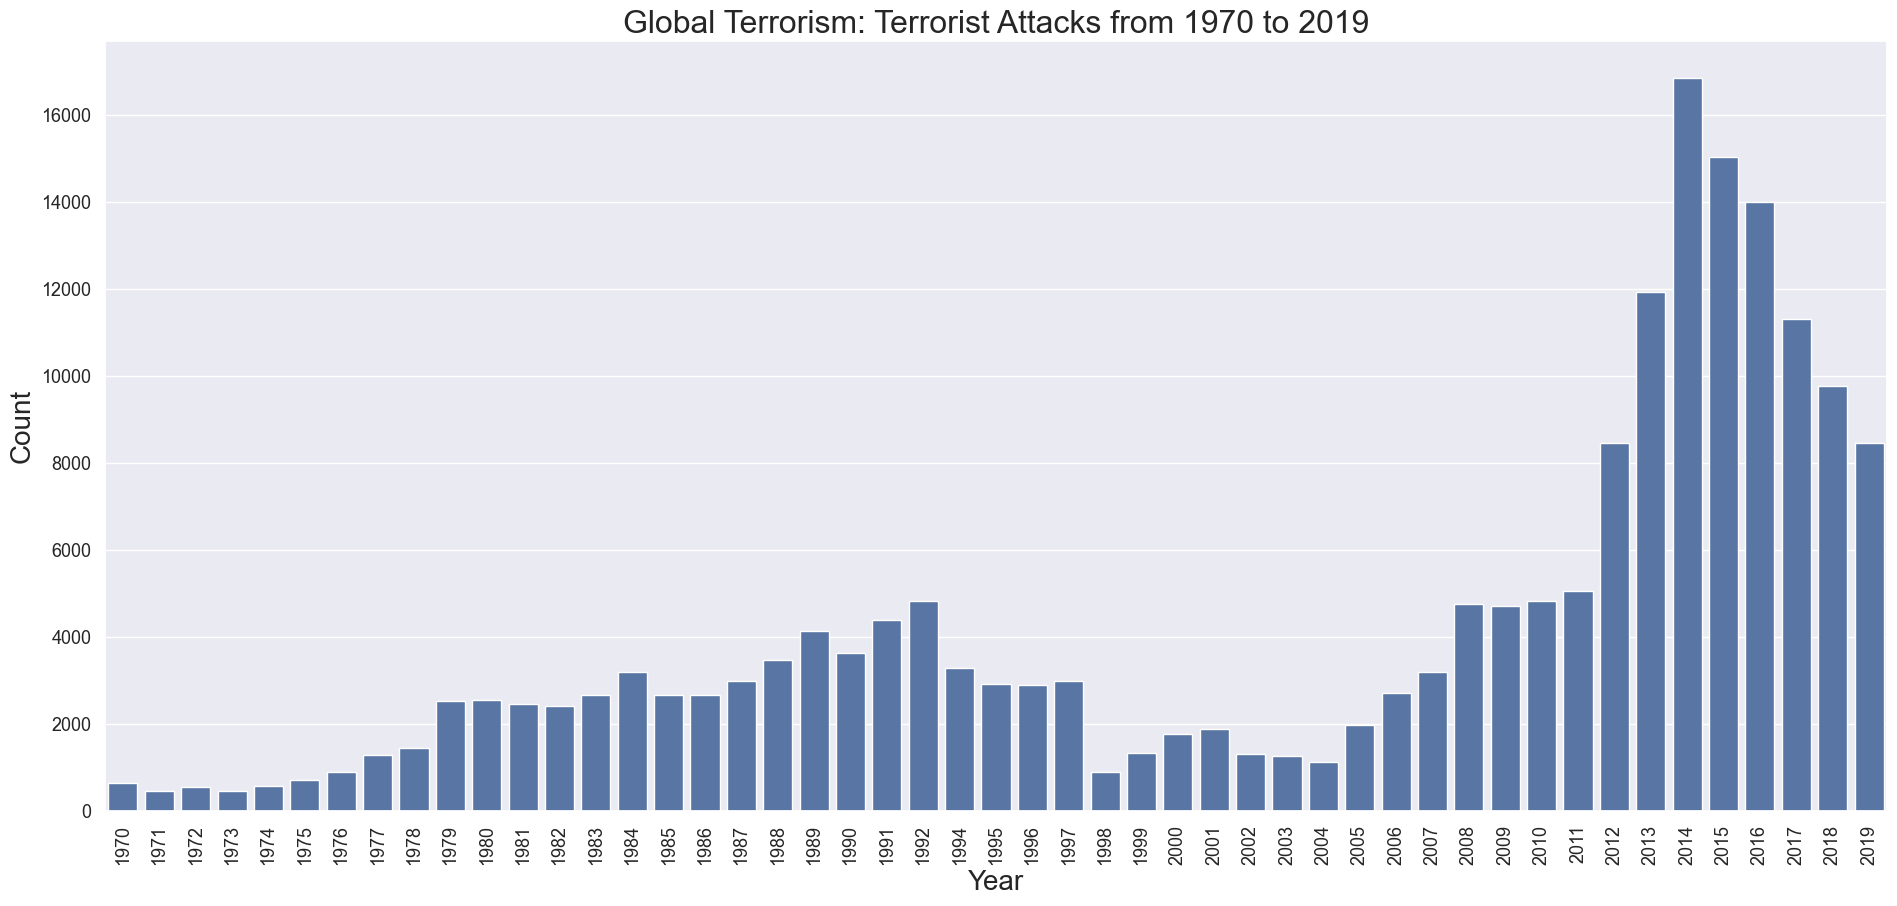

In [24]:
# Plot with the Terrorist Attacks from 1970 to 2016
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))
sns.countplot(x='iyear', data=df)
plt.title('Global Terrorism: Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

This bar plot displays the number of terrorist attacks recorded in each year from 1970 to 2019.

As we can see, the graph shows a relatively low and stable number of attacks in the 1970s and 1980s , followed by a significant increase starting in the early 2000s and a sharp peak around 2014, confirming it as the most violent year in terms of frequency. These trends highlight the growing global threat of terrorism in recent decades and support the need for predictive tools to help understand and anticipate future incidents.

In [25]:
# Groupby number of people killed per year

# df_total_killed_year = df.groupby(['iyear'])['nkill'].sum().to_frame(name = 'Total_sum').reset_index()
df_total_killed_year = df.groupby('iyear').agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_year

,iyear,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,1970,218,643,0.339036,365,0.567652
1,1971,296,463,0.639309,511,1.103672
2,1972,626,551,1.136116,1387,2.517241
3,1973,462,465,0.993548,1176,2.529032
4,1974,649,577,1.124783,1543,2.674177
5,1975,911,727,1.253095,1619,2.226960
6,1976,849,900,0.943333,1593,1.770000
7,1977,688,1292,0.532508,1145,0.886223
8,1978,1666,1455,1.145017,2103,1.445361
9,1979,2575,2533,1.016581,3547,1.400316


Text(0, 0.5, 'Total people killed')

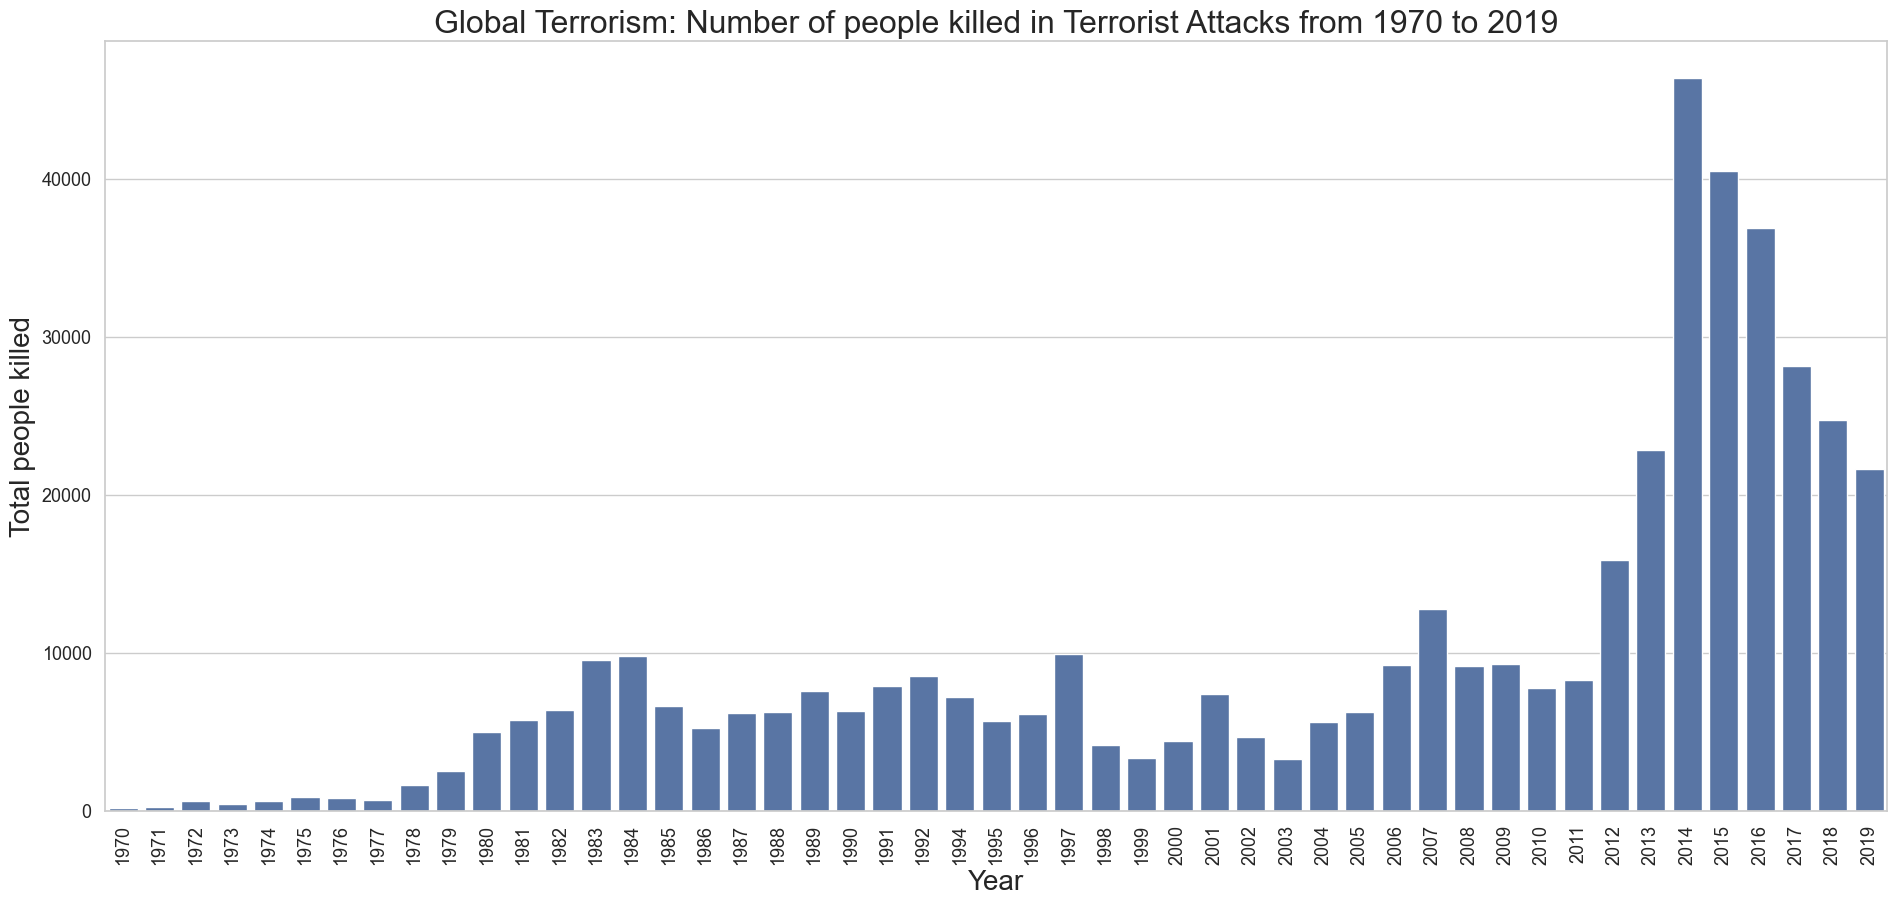

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="iyear", y="Total_killed", data=df_total_killed_year)
             
plt.title('Global Terrorism: Number of people killed in Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Total people killed', fontsize=20)


Text(0, 0.5, 'Total people wound')

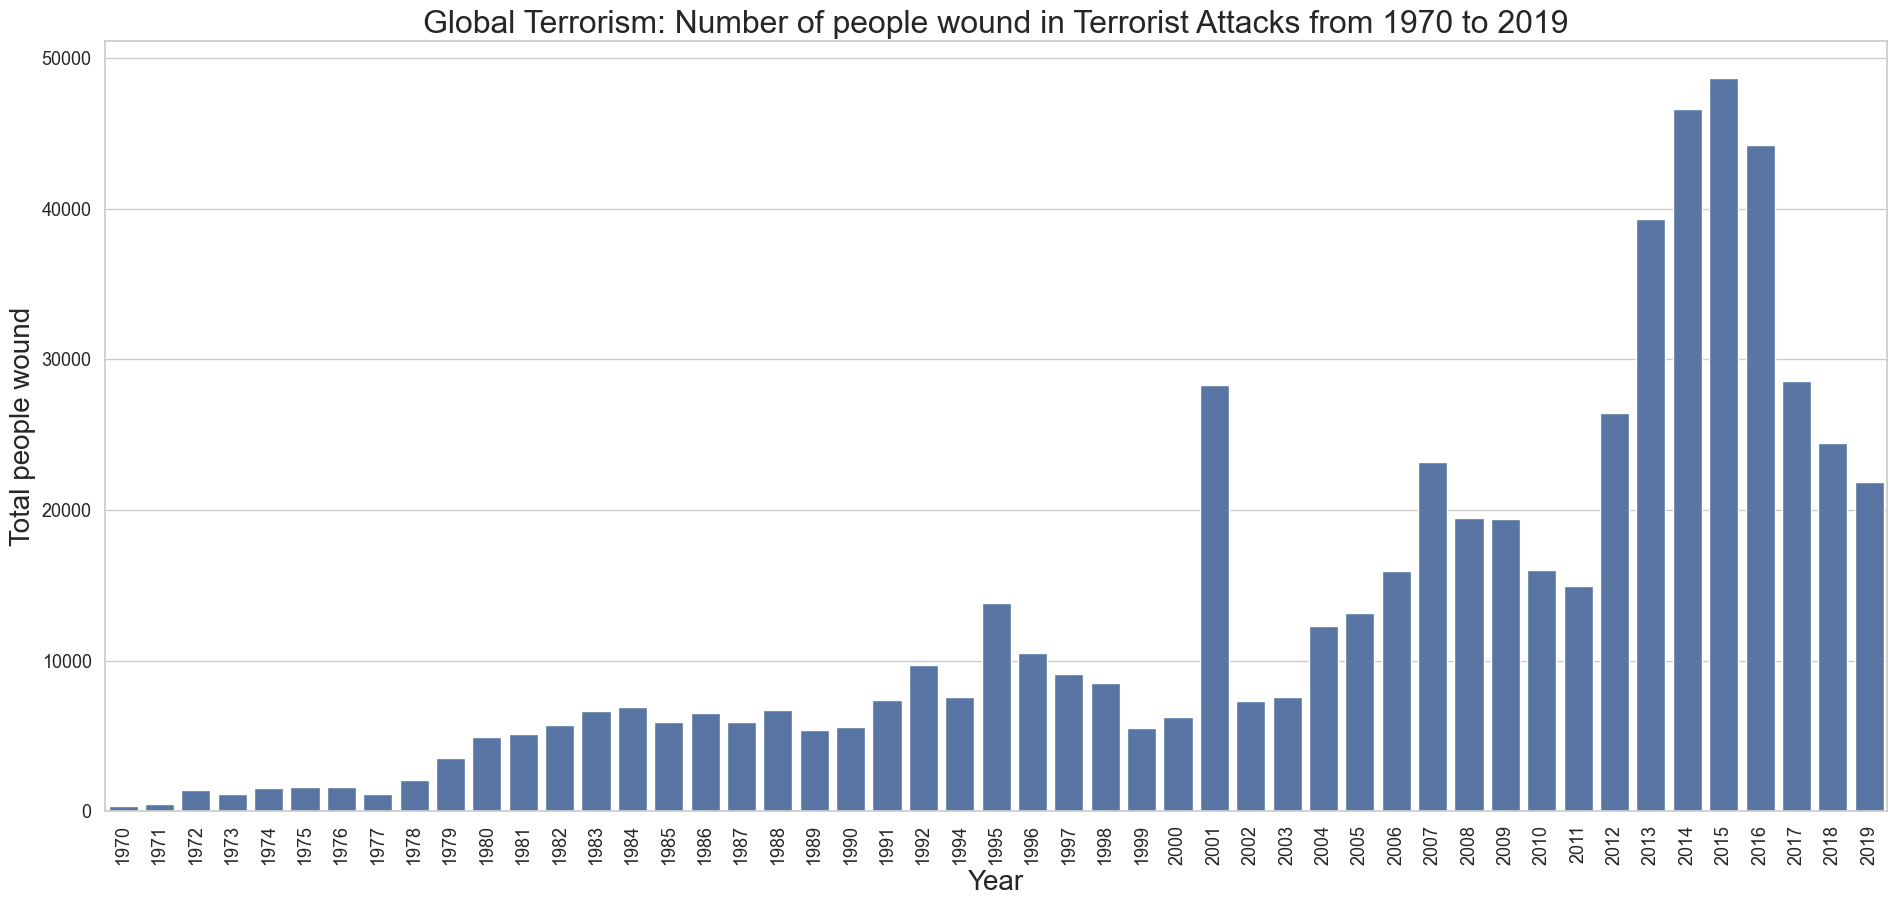

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))

sns.set_theme(style="whitegrid")
ax2 = sns.barplot(x="iyear", y="Total_wound", data=df_total_killed_year)
             
plt.title('Global Terrorism: Number of people wound in Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Total people wound', fontsize=20)

We can see that the number of terrorist attacks have increased since 2014,  and also de total amount of people killed.

The worst year was 2014, with 16794 terrorist attack and 46308 pepople killed. With regard to people wounded we see an outlier in 2001, due to the terrorst attack in US (11th September). The trend shows that 2009 to 2019 has been the worst decade of the period analysed.

## Trend Analysis: Terrorist Attacks by Region

In this part we will analyse the trends by region, to see if the global terrorism is impacting in a different way in each region, or is a common problem.

After understanding the evolution of terrorist activity over time, the next step is to examine where these attacks are most concentrated.The geographic distribution will help us to identify which countries and regions have been most affected, and whether certain areas have experienced sustained or intensified violence over the years. This will help us to add valuable geopolitical context, and to reveal potential regional dynamics or conflicts that may explain the prevalence of terrorism in specific parts of the world. 

In [28]:
df_total_killed_year_by_region = df.groupby(['iyear','region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_year_by_region

,iyear,region_txt,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,1970,Australasia & Oceania,0,1,0.000000,0,0.000000
1,1970,Central America & Caribbean,3,6,0.500000,0,0.000000
2,1970,East Asia,2,2,1.000000,3,1.500000
3,1970,Eastern Europe,18,12,1.500000,27,2.250000
4,1970,Middle East & North Africa,15,28,0.535714,23,0.821429
...,...,...,...,...,...,...,...
546,2019,South America,155,272,0.569853,323,1.187500
547,2019,South Asia,9437,3031,3.113494,10015,3.304190
548,2019,Southeast Asia,645,714,0.903361,907,1.270308
549,2019,Sub-Saharan Africa,7113,1933,3.679772,4516,2.336265


In [29]:
df_total_killed_by_region = df.groupby(['region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_by_region

,region_txt,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,Australasia & Oceania,214,299,0.715719,336,1.123746
1,Central America & Caribbean,28770,9374,3.069127,14749,1.573394
2,Central Asia,999,559,1.787120,1956,3.499106
3,East Asia,1221,817,1.494492,9363,11.460220
4,Eastern Europe,7755,5239,1.480244,12834,2.449704
5,Middle East & North Africa,149862,55486,2.700898,236989,4.271149
6,North America,5273,3692,1.428223,27550,7.462080
7,South America,29703,18700,1.588396,22267,1.190749
8,South Asia,122004,50797,2.401795,165700,3.262004
9,Southeast Asia,15512,13547,1.145051,27913,2.060456


Text(0, 0.5, 'Number of Attacks')

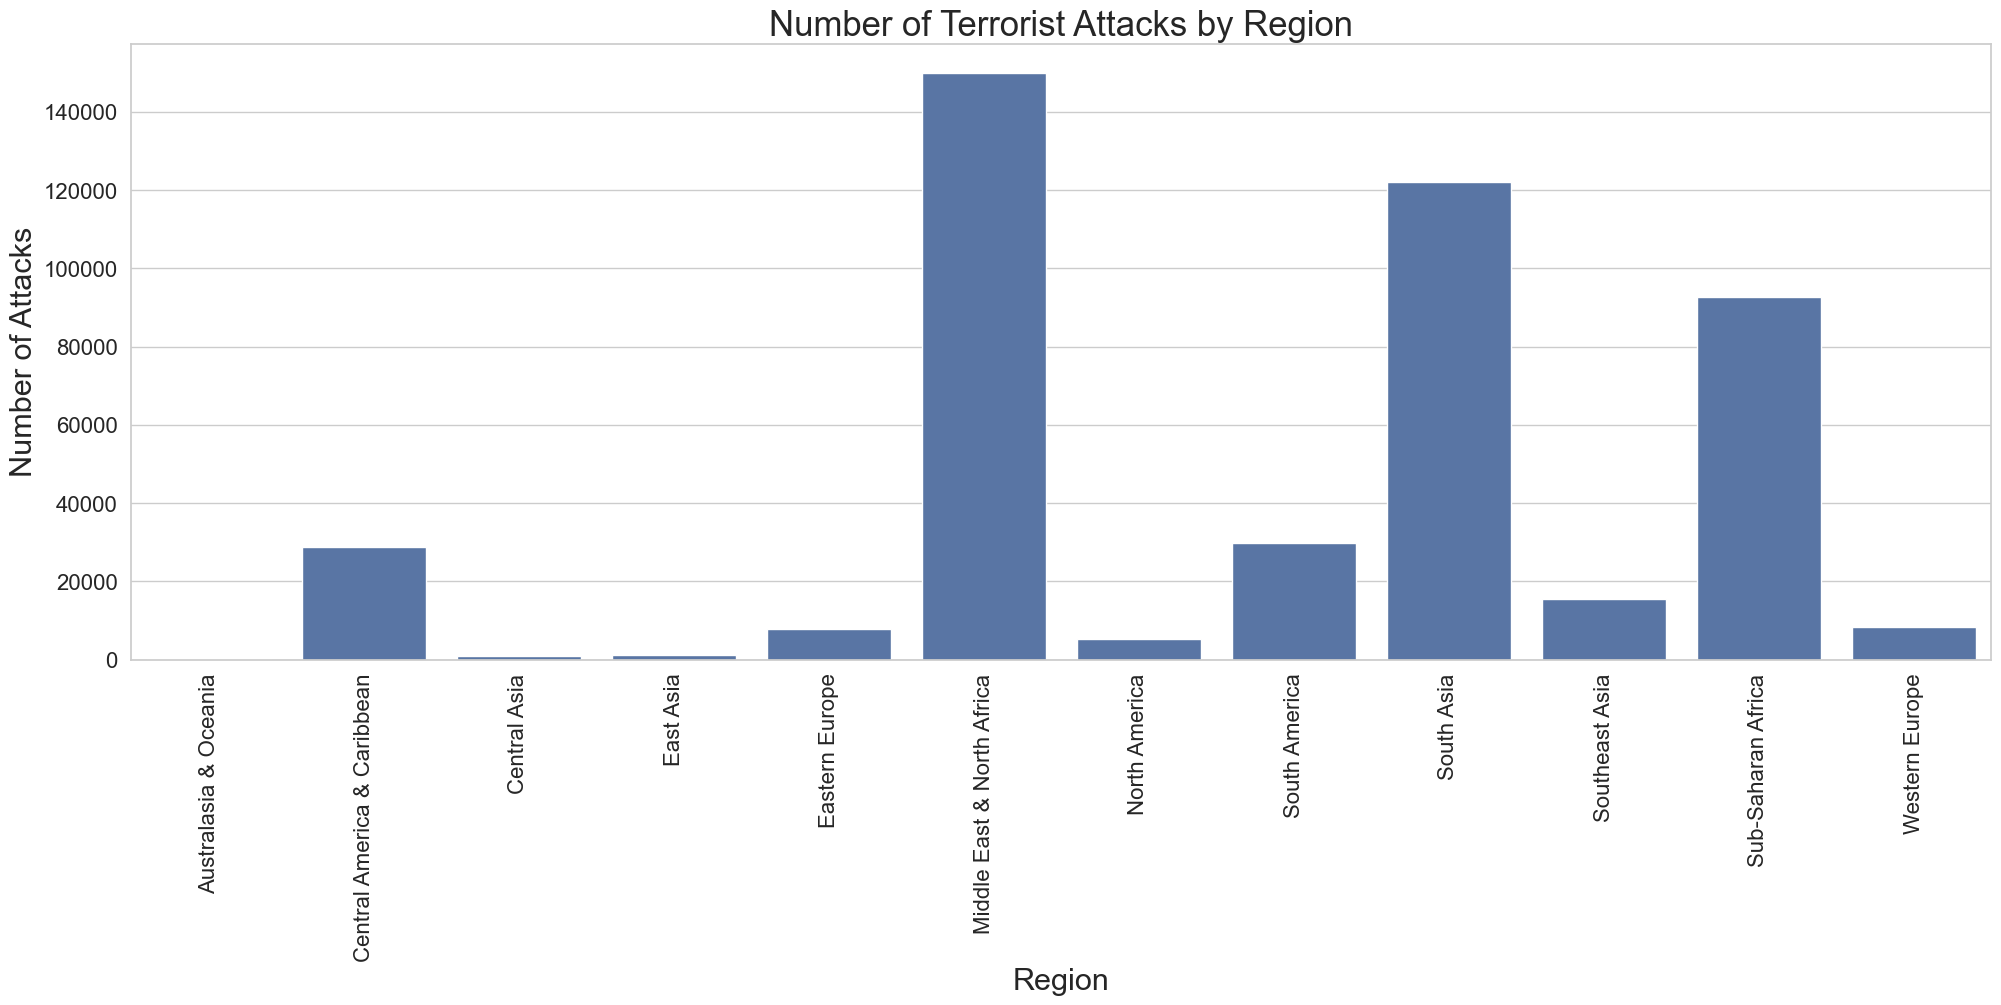

In [30]:
plt.figure(figsize=(24, 8))
sns.barplot(x="region_txt", y="Total_killed", data=df_total_killed_by_region)
plt.title('Number of Terrorist Attacks by Region', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Region', fontsize=22) 
plt.ylabel('Number of Attacks', fontsize=22)

The most dangerous areas taking into account the total number of attacks, is Middle East and North Africa, followed by South asia and Sub-Saharan Africa. Being the safest Australasia & Oceania, Central Asia and East Asia.

Text(0.5, 1.0, 'Western Europe')

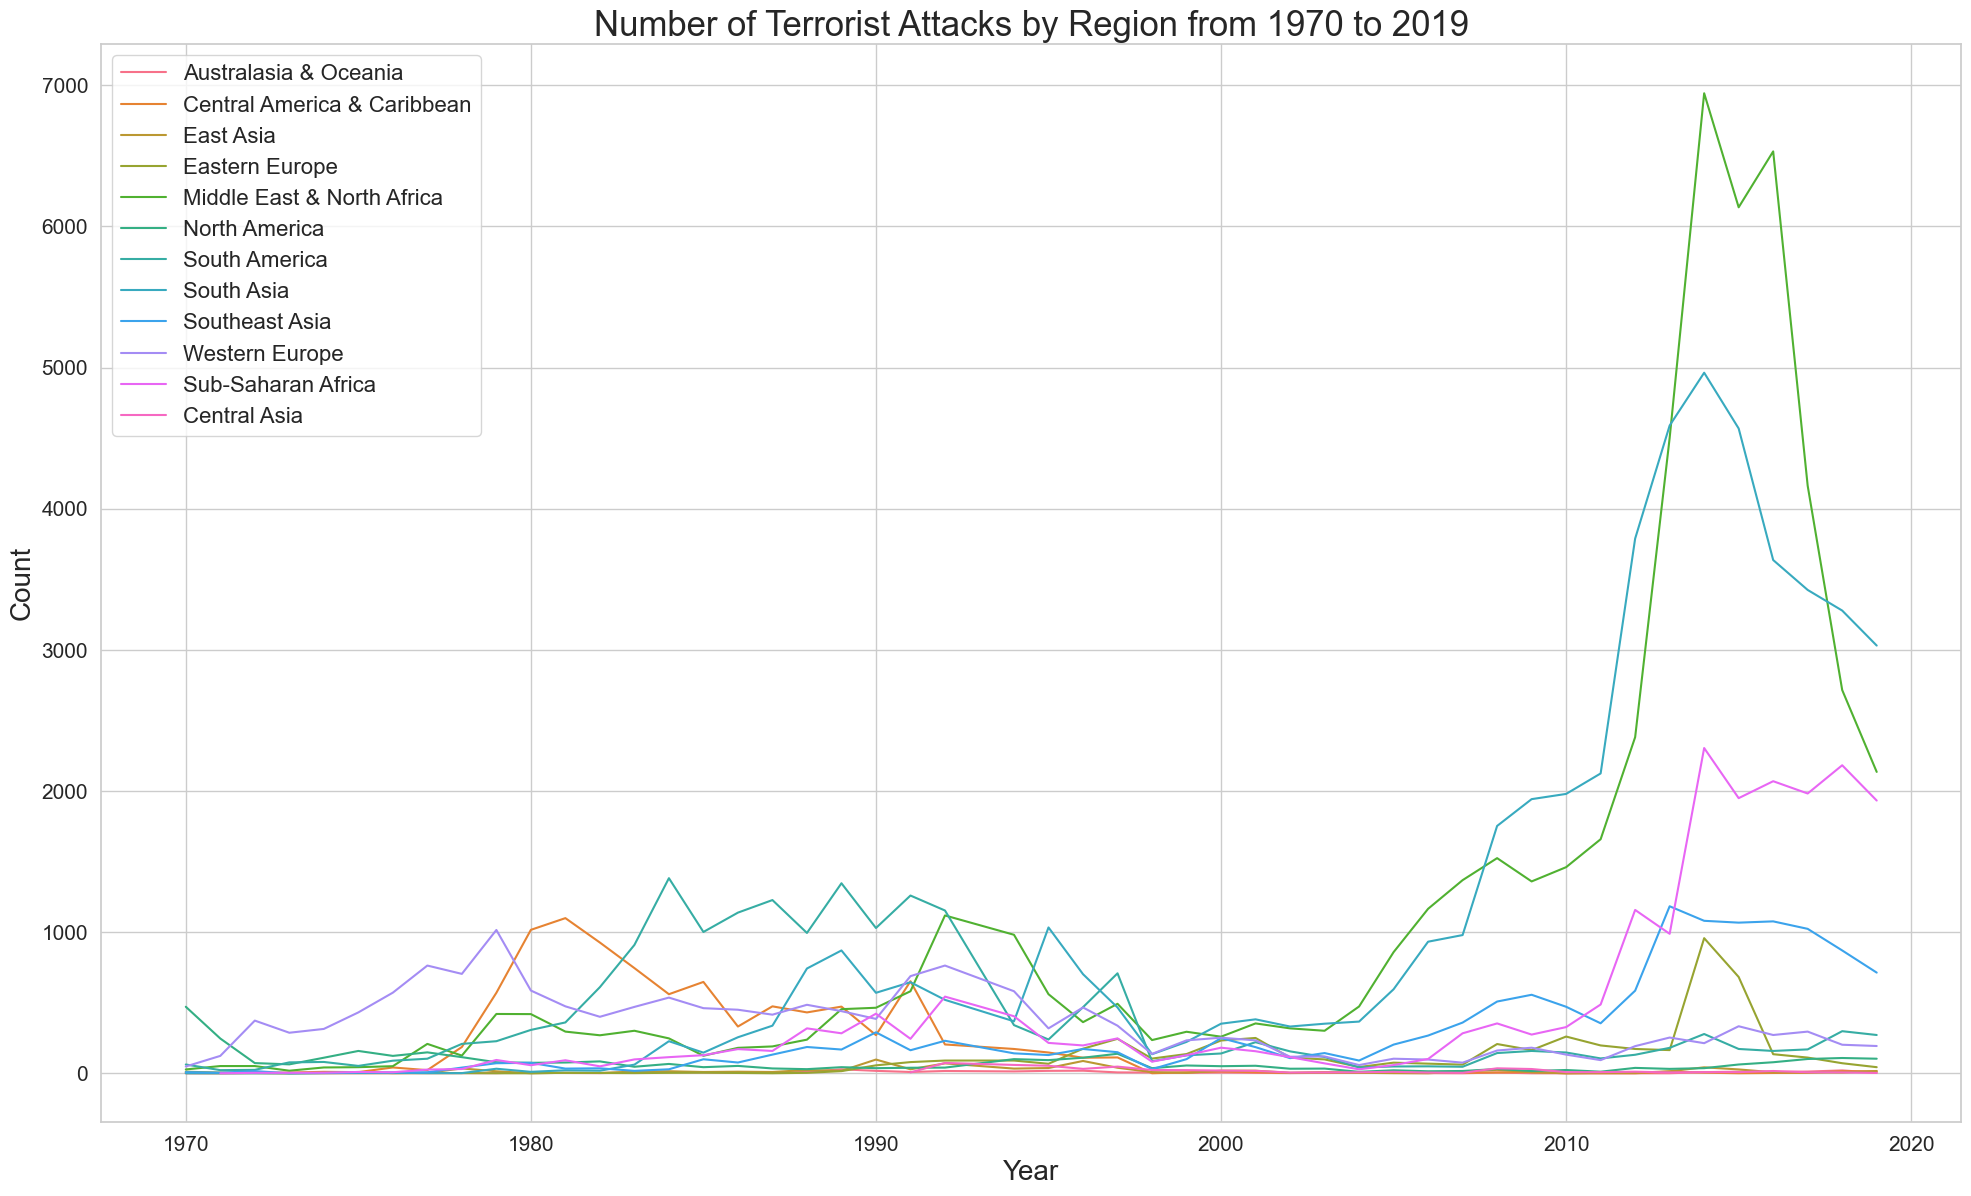

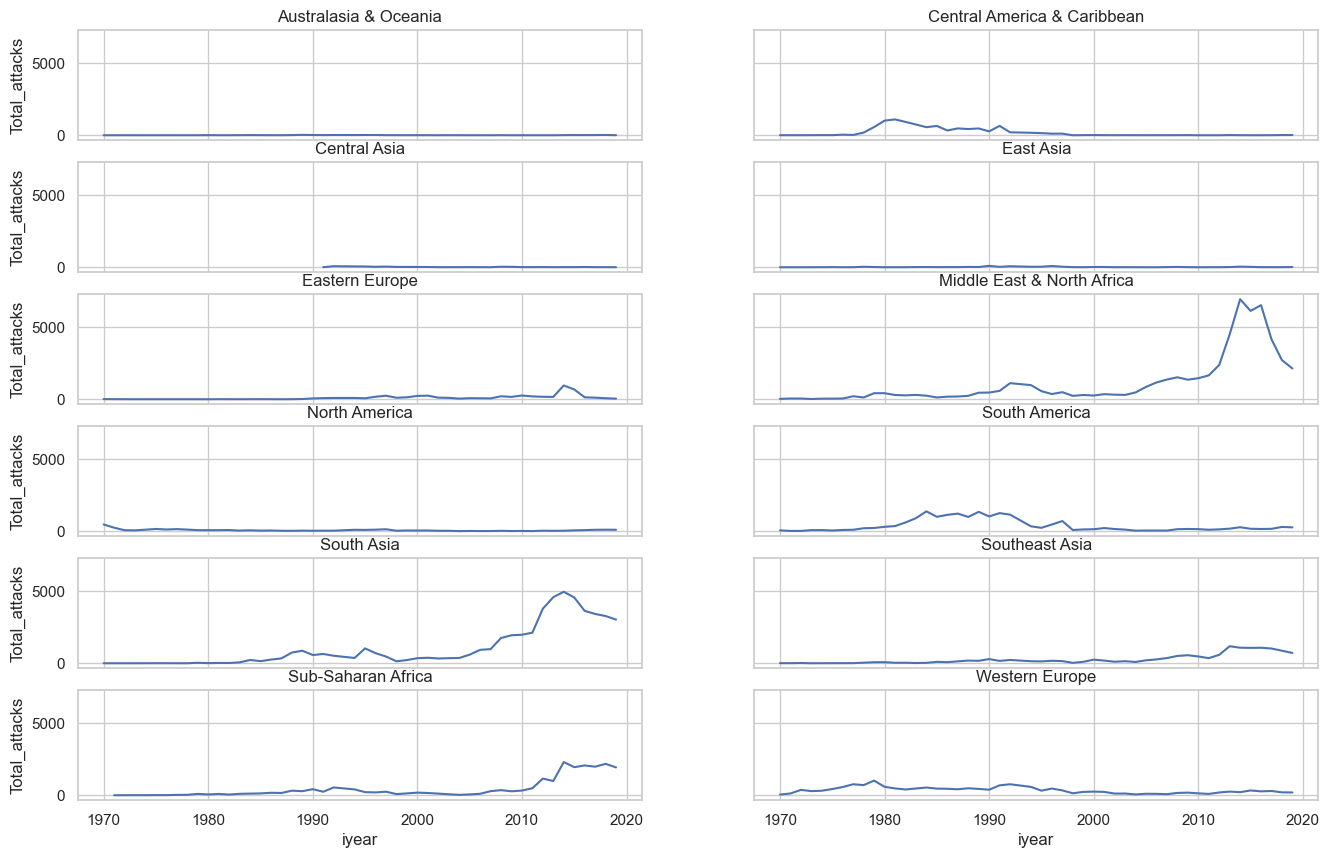

In [31]:
plt.figure(figsize=(24, 14))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_attacks', hue='region_txt')

plt.title('Number of Terrorist Attacks by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_attacks', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_attacks', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_attacks', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_attacks', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_attacks', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_attacks', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_attacks', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_attacks', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_attacks', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_attacks', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_attacks', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_attacks', ax=axes[5,1], legend=False).set_title('Western Europe')



As we can see the trends in Middle East&North Africa, South Asia and Sub-sahara, shows and exponential increase in the number of attacks, meanwhile, Central America & Caribbean, South America and Western Europe, shows a reduction in the numbers of attacks compared with 1980-1990 period.

Text(0.5, 1.0, 'Western Europe')

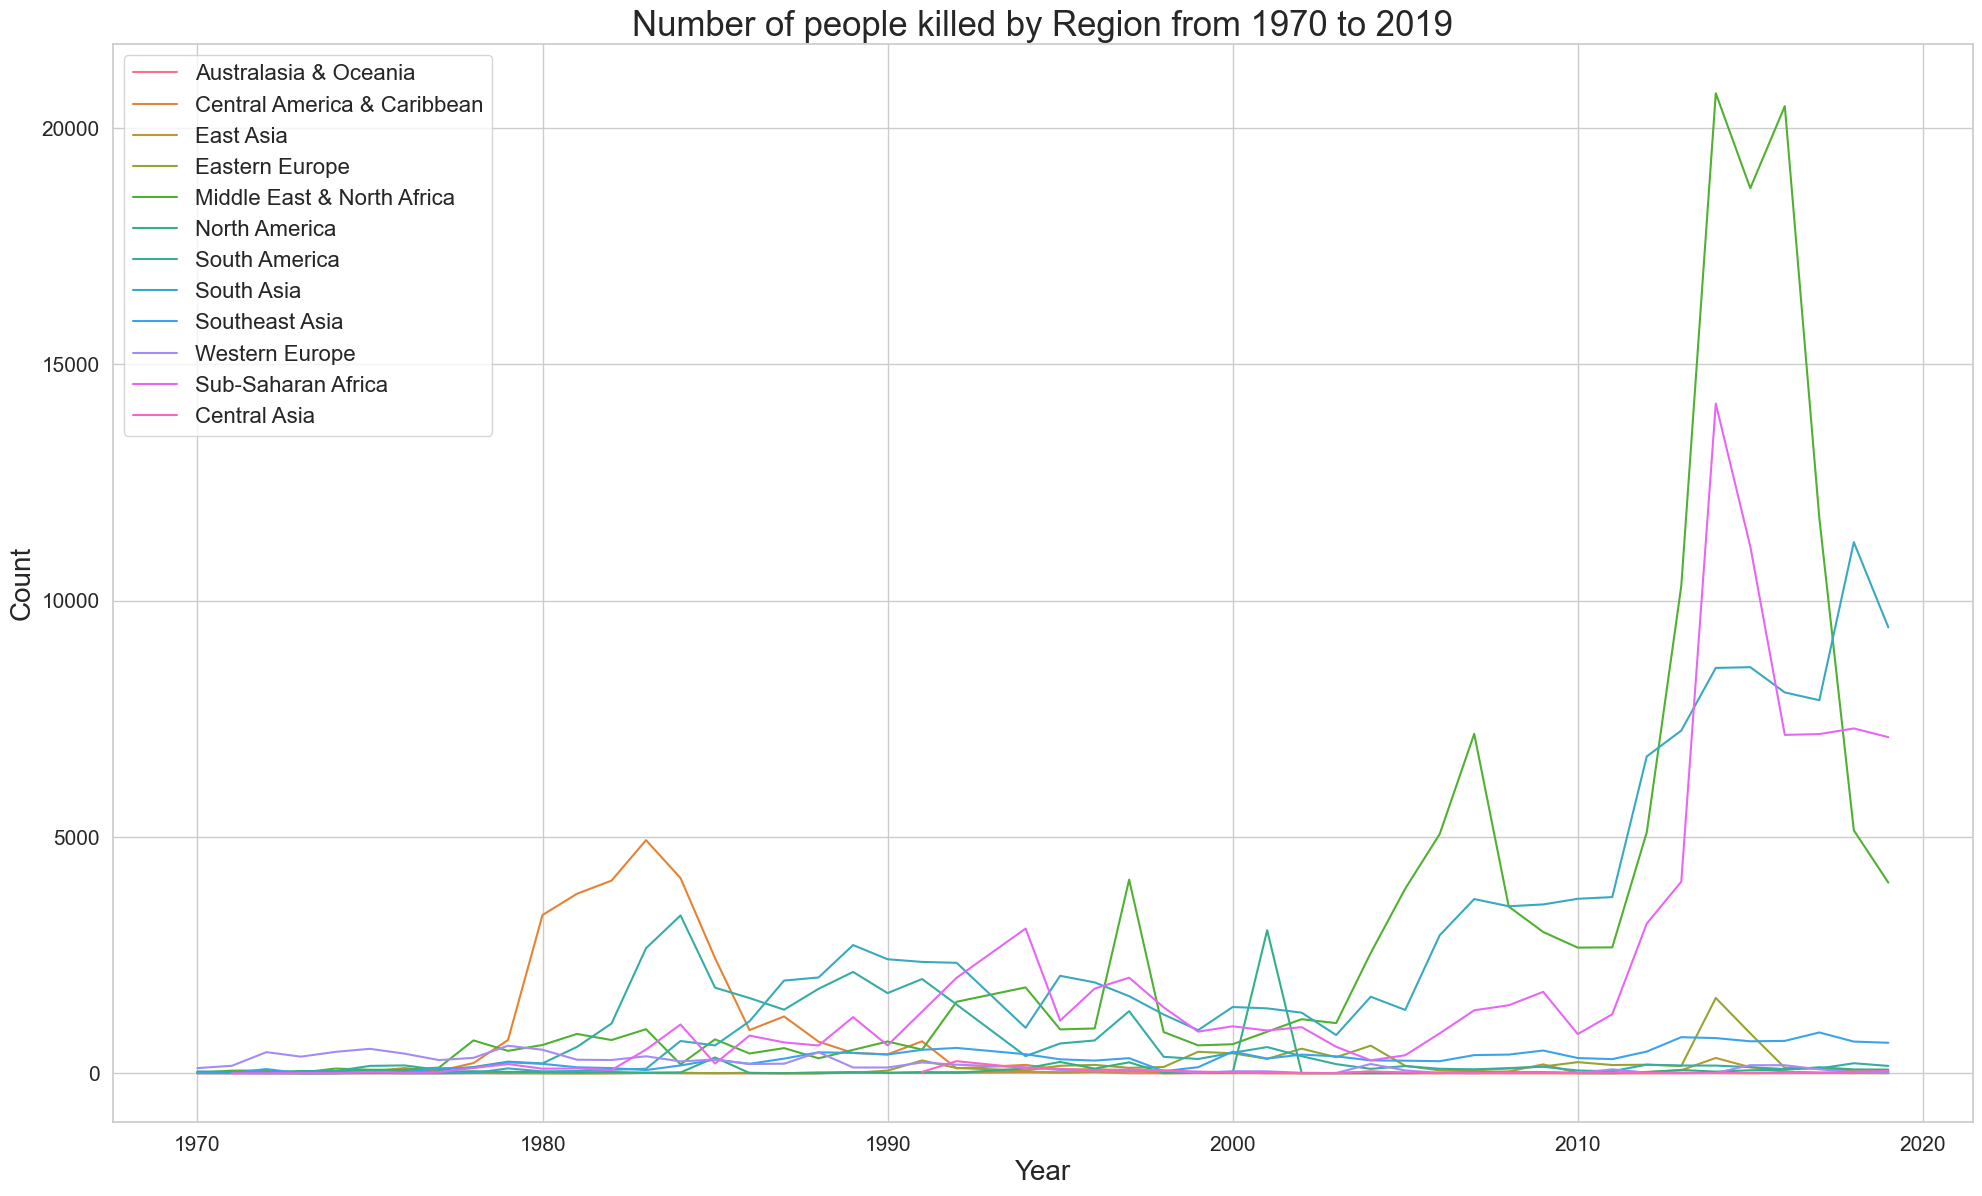

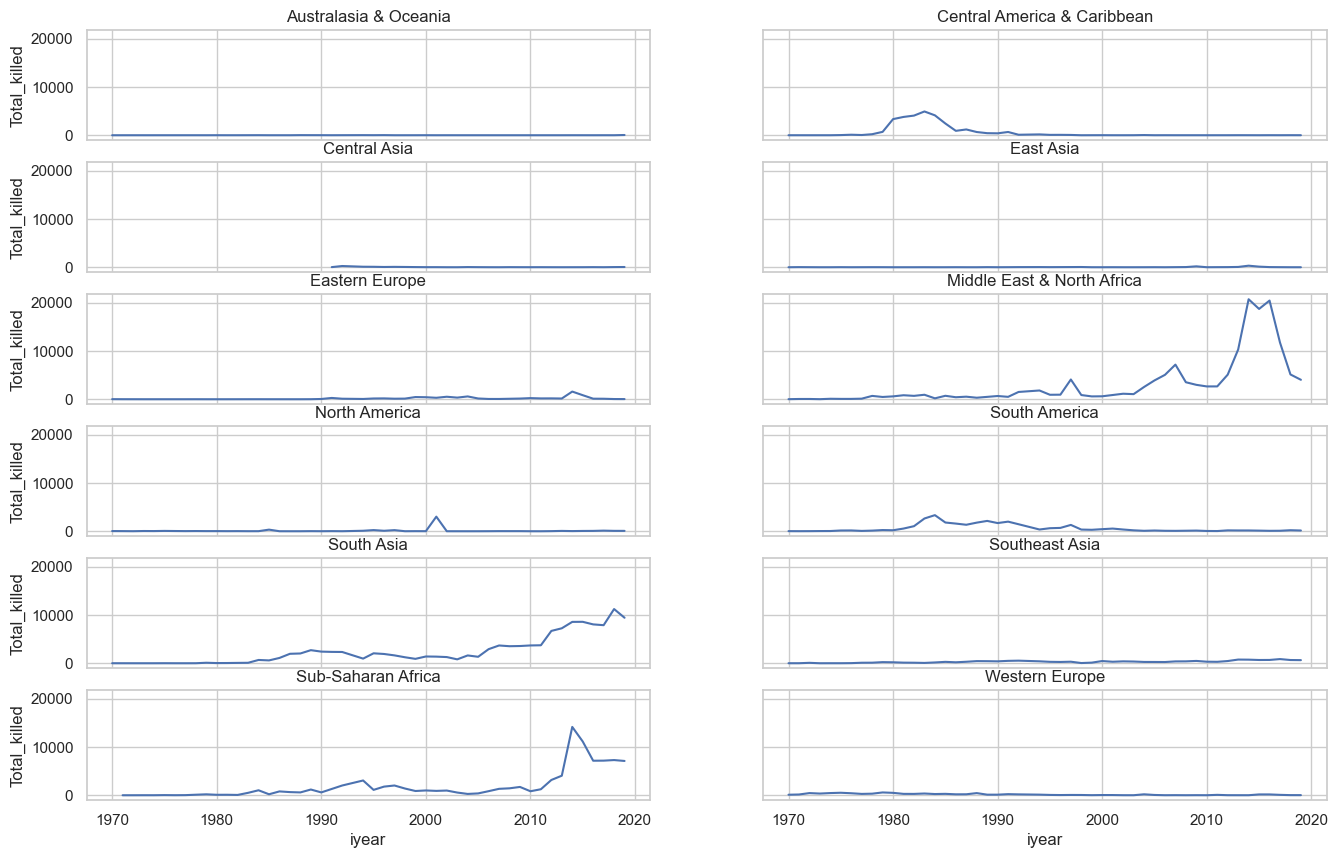

In [32]:
plt.figure(figsize=(24, 14))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_killed', hue='region_txt')

plt.title('Number of people killed by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_killed', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_killed', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_killed', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_killed', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_killed', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_killed', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_killed', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_killed', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_killed', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_killed', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_killed', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_killed', ax=axes[5,1], legend=False).set_title('Western Europe')

Text(0.5, 1.0, 'Western Europe')

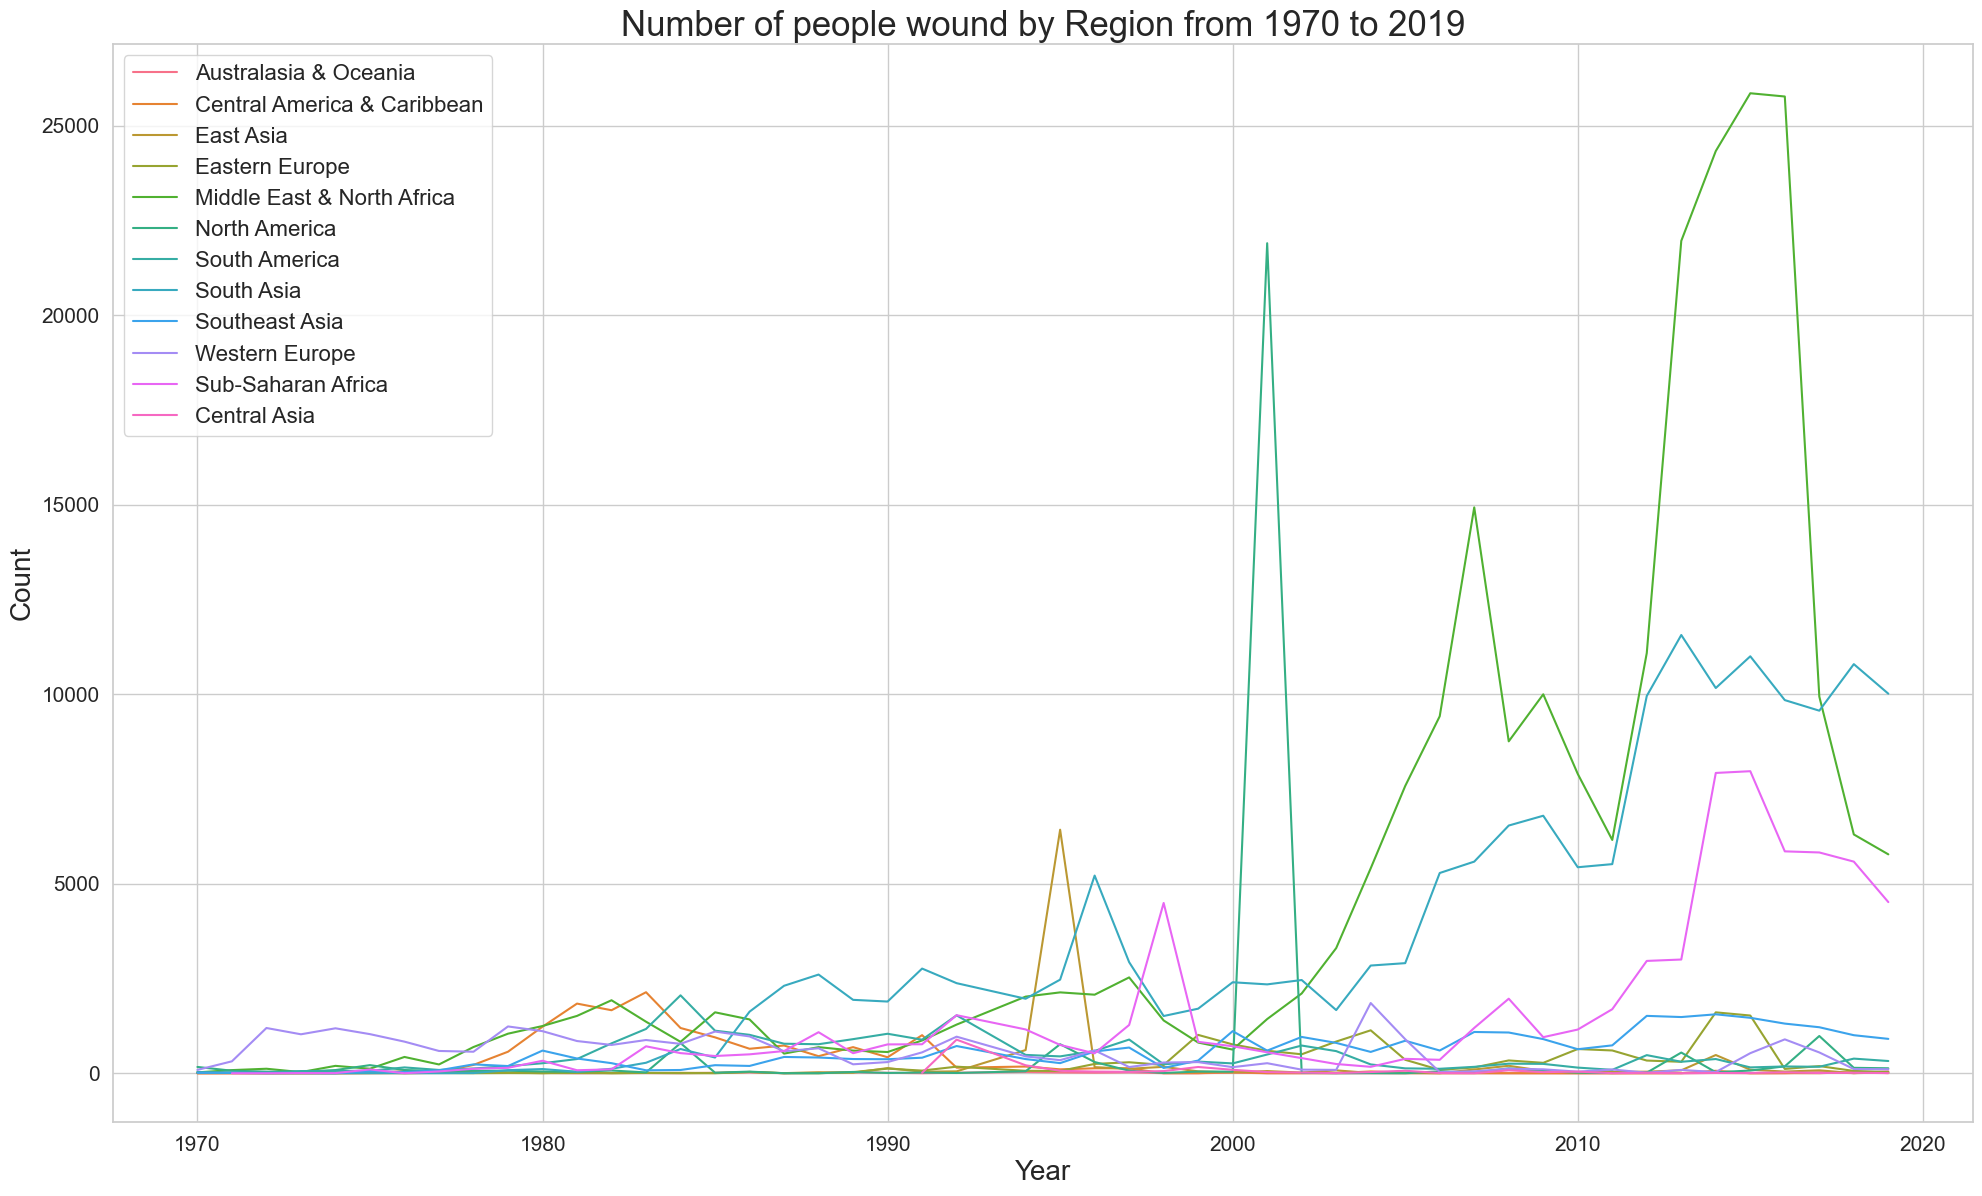

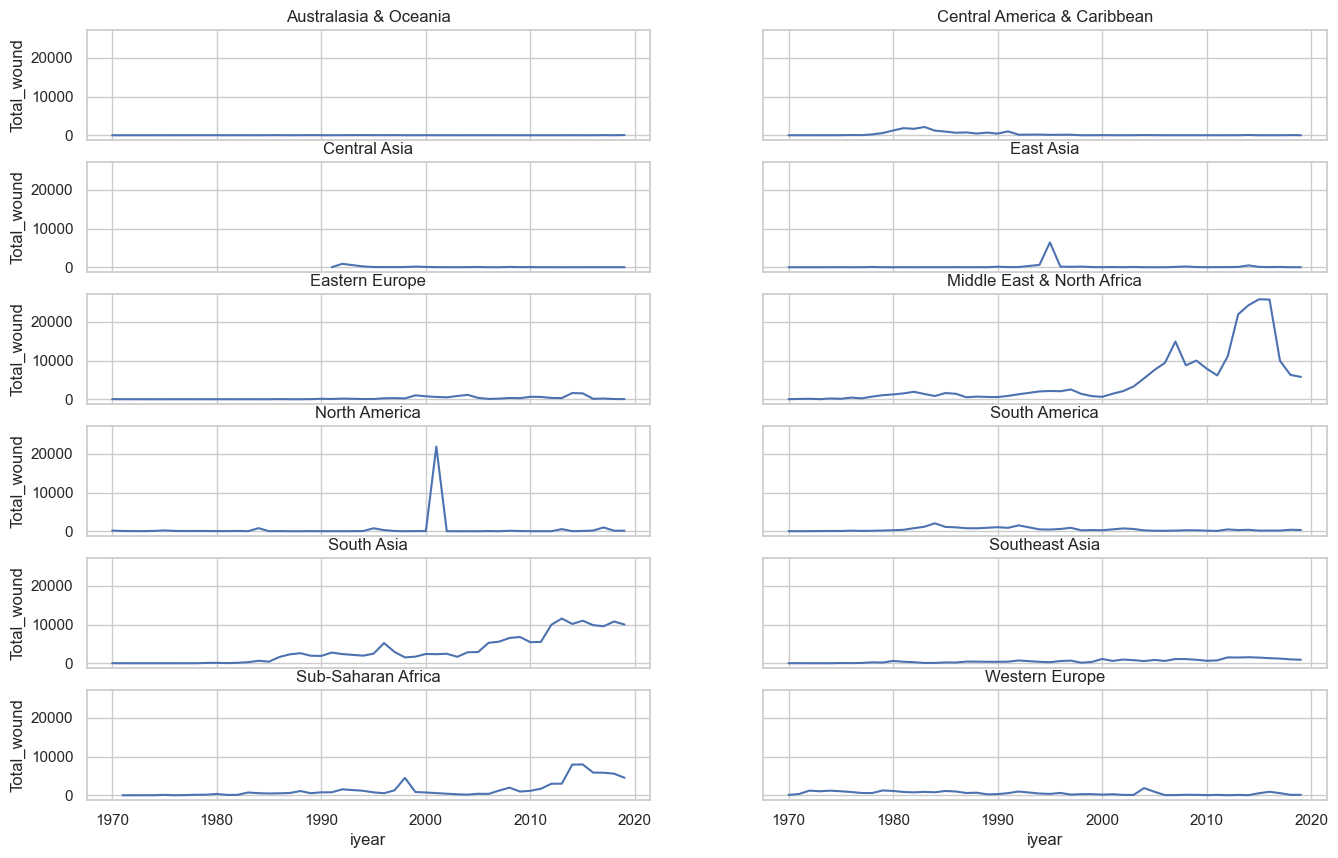

In [33]:
plt.figure(figsize=(24, 14))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_wound', hue='region_txt')

plt.title('Number of people wound by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_wound', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_wound', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_wound', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_wound', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_wound', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_wound', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_wound', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_wound', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_wound', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_wound', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_wound', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_wound', ax=axes[5,1], legend=False).set_title('Western Europe')

## Attack Type analysis

In this part, we will proceed analysing which kind of attack is the most dangerous and most frequent used 

In [34]:
df_total_types_killed_by_country = df.groupby(['region_txt','attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed_by_country

,region_txt,attacktype1_txt,Total_attacks,Total_killed,Total_wound
0,Australasia & Oceania,Armed Assault,55,135,146
1,Australasia & Oceania,Assassination,30,33,8
2,Australasia & Oceania,Bombing/Explosion,74,17,89
3,Australasia & Oceania,Facility/Infrastructure Attack,91,0,16
4,Australasia & Oceania,Hijacking,3,0,0
5,Australasia & Oceania,Hostage Taking (Barricade Incident),6,6,10
6,Australasia & Oceania,Hostage Taking (Kidnapping),13,7,20
7,Australasia & Oceania,Unarmed Assault,11,1,41
8,Australasia & Oceania,Unknown,16,15,6
9,Central America & Caribbean,Armed Assault,3839,21561,8100


In [35]:
df_total_types_killed = df.groupby(['attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed

,attacktype1_txt,Total_attacks,Total_killed,Total_wound
0,Armed Assault,45844,168964,96333
1,Assassination,20400,25952,19427
2,Bombing/Explosion,93981,175717,409075
3,Facility/Infrastructure Attack,11467,5403,6101
4,Hijacking,703,3837,22633
5,Hostage Taking (Barricade Incident),1095,5095,4818
6,Hostage Taking (Kidnapping),12684,34473,19555
7,Unarmed Assault,1153,884,14823
8,Unknown,9228,42003,23764


Text(0, 0.5, 'Number of Attacks')

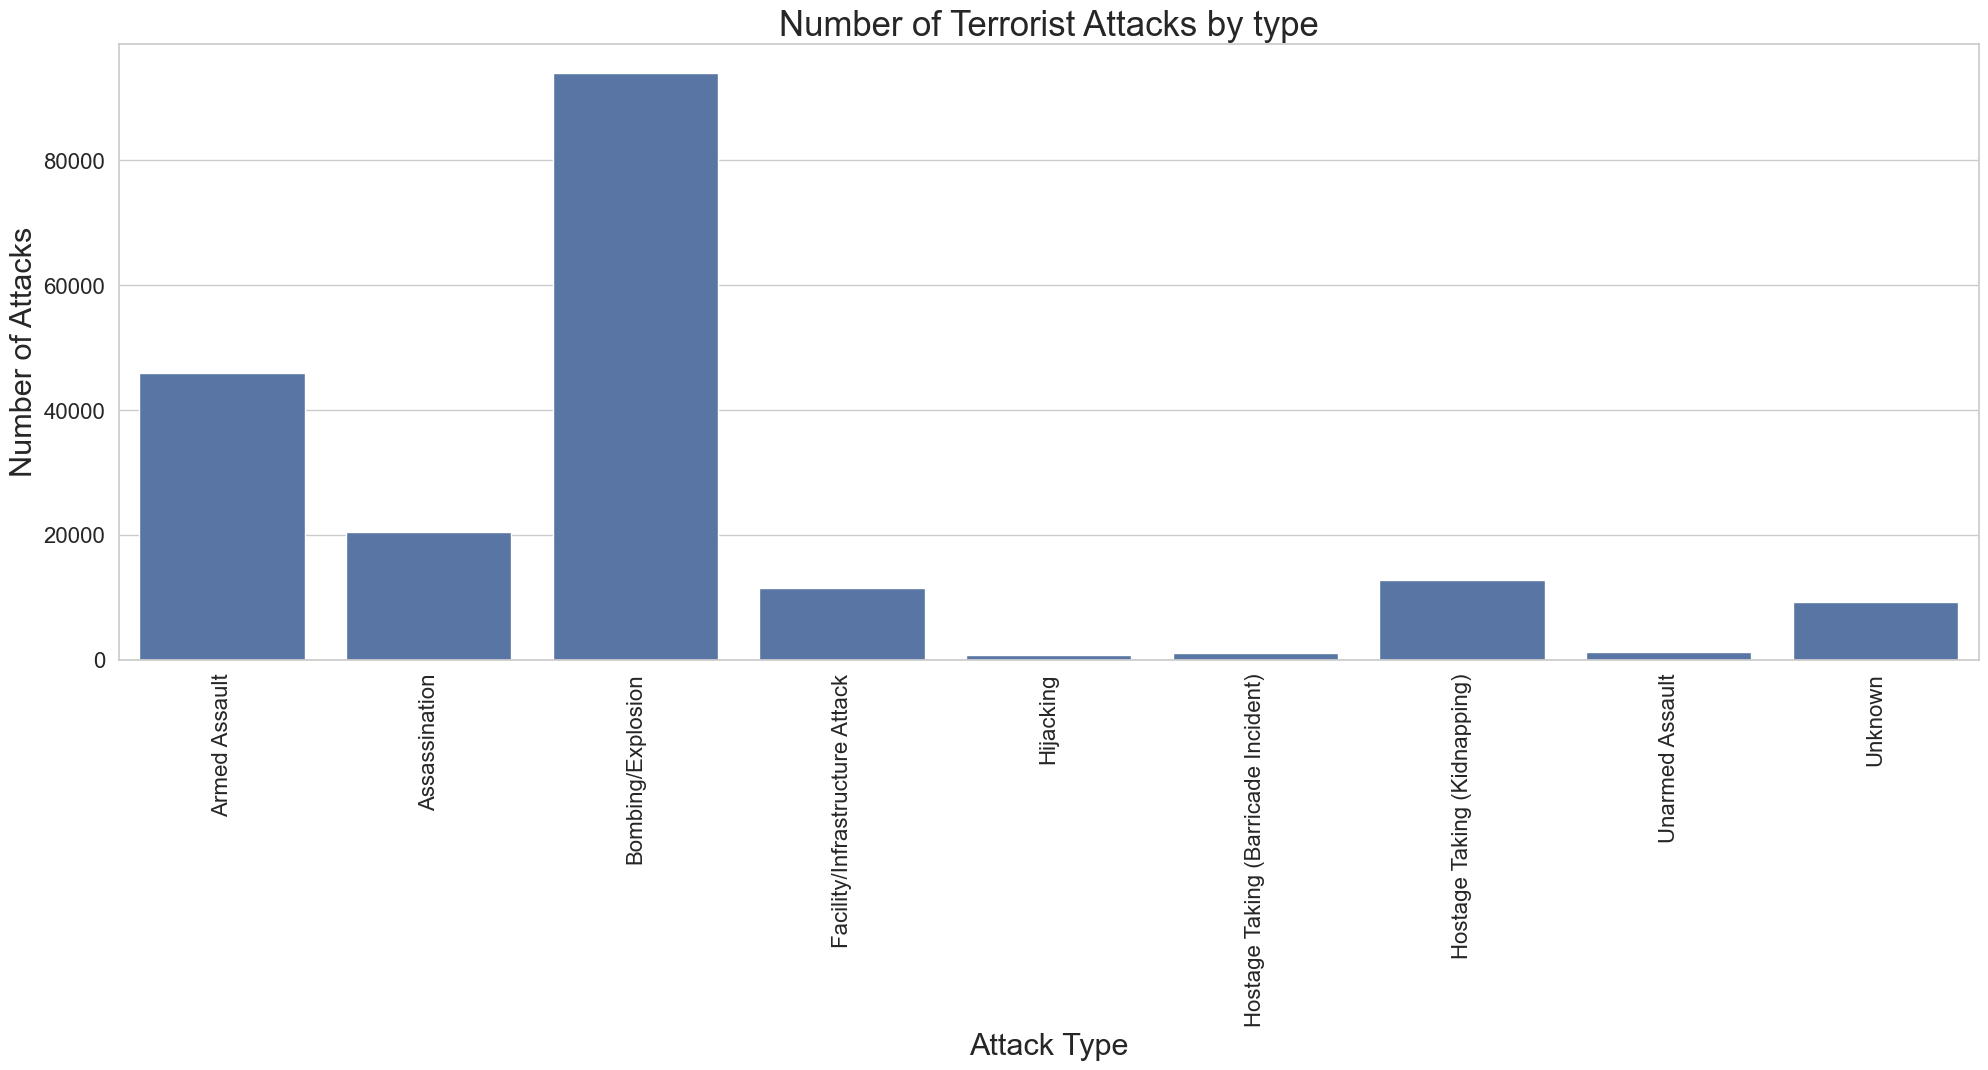

In [36]:
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype1_txt', y="Total_attacks", data=df_total_types_killed)
plt.title('Number of Terrorist Attacks by type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22) 
plt.ylabel('Number of Attacks', fontsize=22)

As we can see the most frequent used terroris attack method is Bombing/Explosion followed by Armed Assault. Hijacking, Unarmed Assaults and Hostage Taking are not very common methods used by terrorists

Text(0, 0.5, 'Number of people killed')

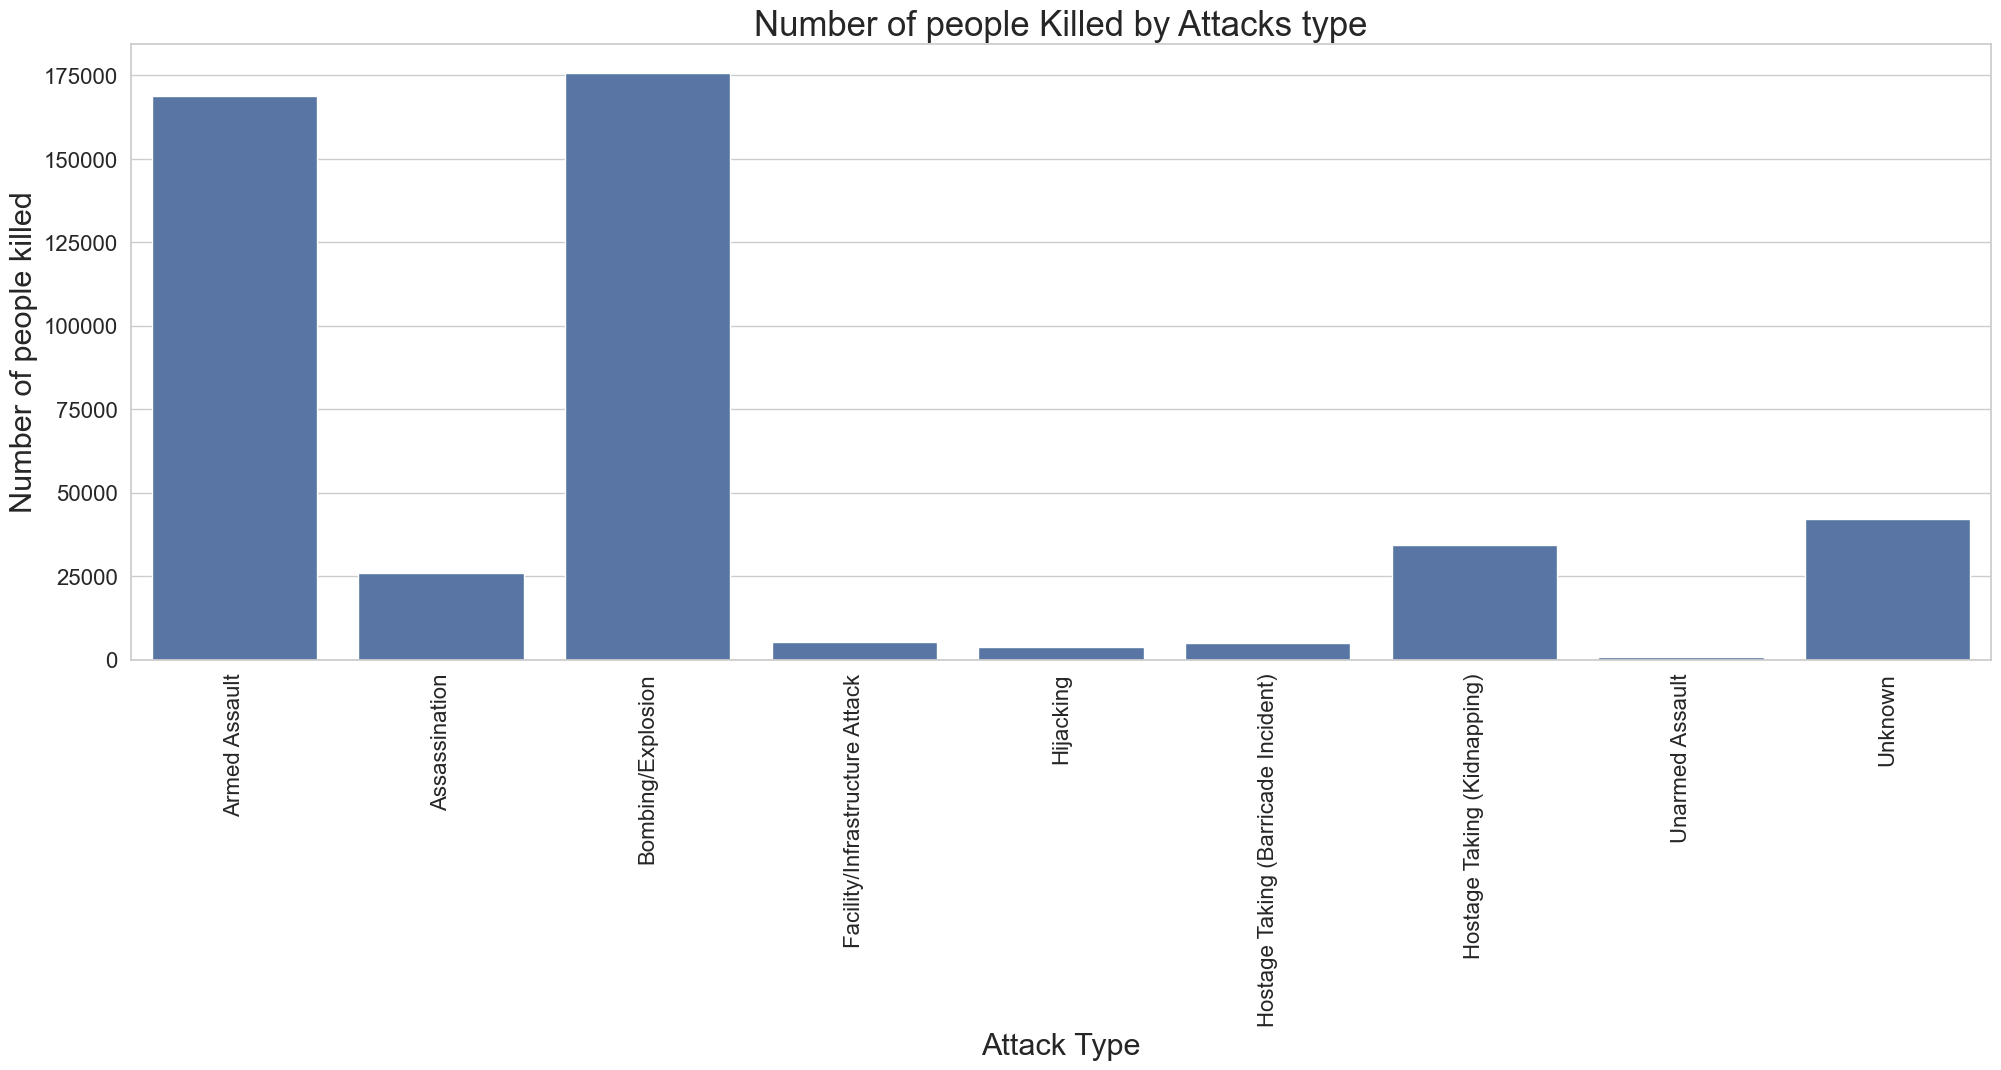

In [37]:
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype1_txt', y="Total_killed", data=df_total_types_killed)
plt.title('Number of people Killed by Attacks type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22) 
plt.ylabel('Number of people killed', fontsize=22)

As we can see, most of the people killed by terroist attacks was by bombing and explotion, followed by Armed assault.

Text(0, 0.5, 'Number of people wound')

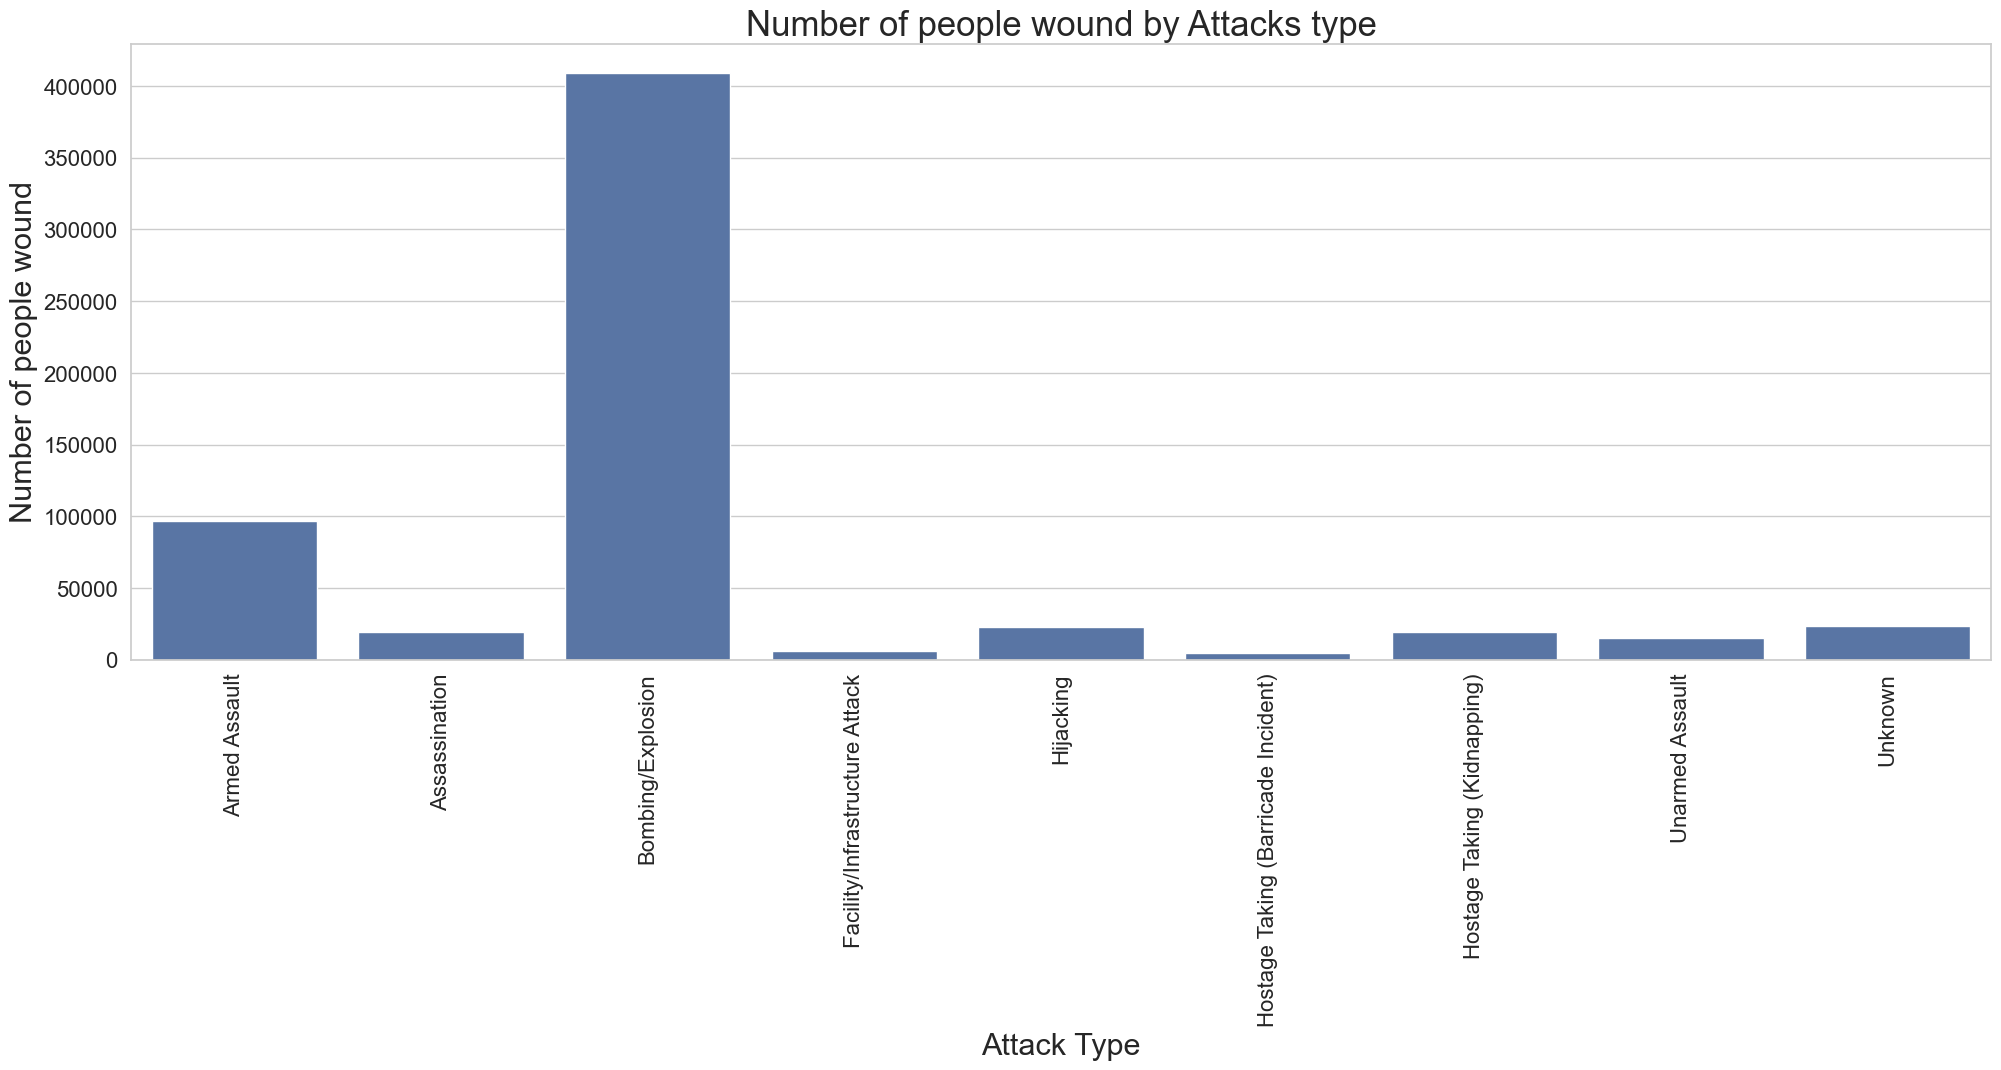

In [38]:
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype1_txt', y="Total_wound", data=df_total_types_killed)
plt.title('Number of people wound by Attacks type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22) 
plt.ylabel('Number of people wound', fontsize=22)

As we can see, most of the people wound by terroist attacks was by bombing and explotion. 

## Trend analysis of  type of attacks during the period (1970-2019)

In [39]:
df_total_types_killed_year = df.groupby(['iyear','attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed_year

,iyear,attacktype1_txt,Total_attacks,Total_killed,Total_wound
0,1970,Armed Assault,61,56,77
1,1970,Assassination,21,17,24
2,1970,Bombing/Explosion,332,96,184
3,1970,Facility/Infrastructure Attack,174,27,60
4,1970,Hijacking,11,1,1
5,1970,Hostage Taking (Barricade Incident),3,0,0
6,1970,Hostage Taking (Kidnapping),33,18,12
7,1970,Unarmed Assault,3,0,5
8,1970,Unknown,5,3,2
9,1971,Armed Assault,43,28,38


Text(0, 0.5, 'Count')

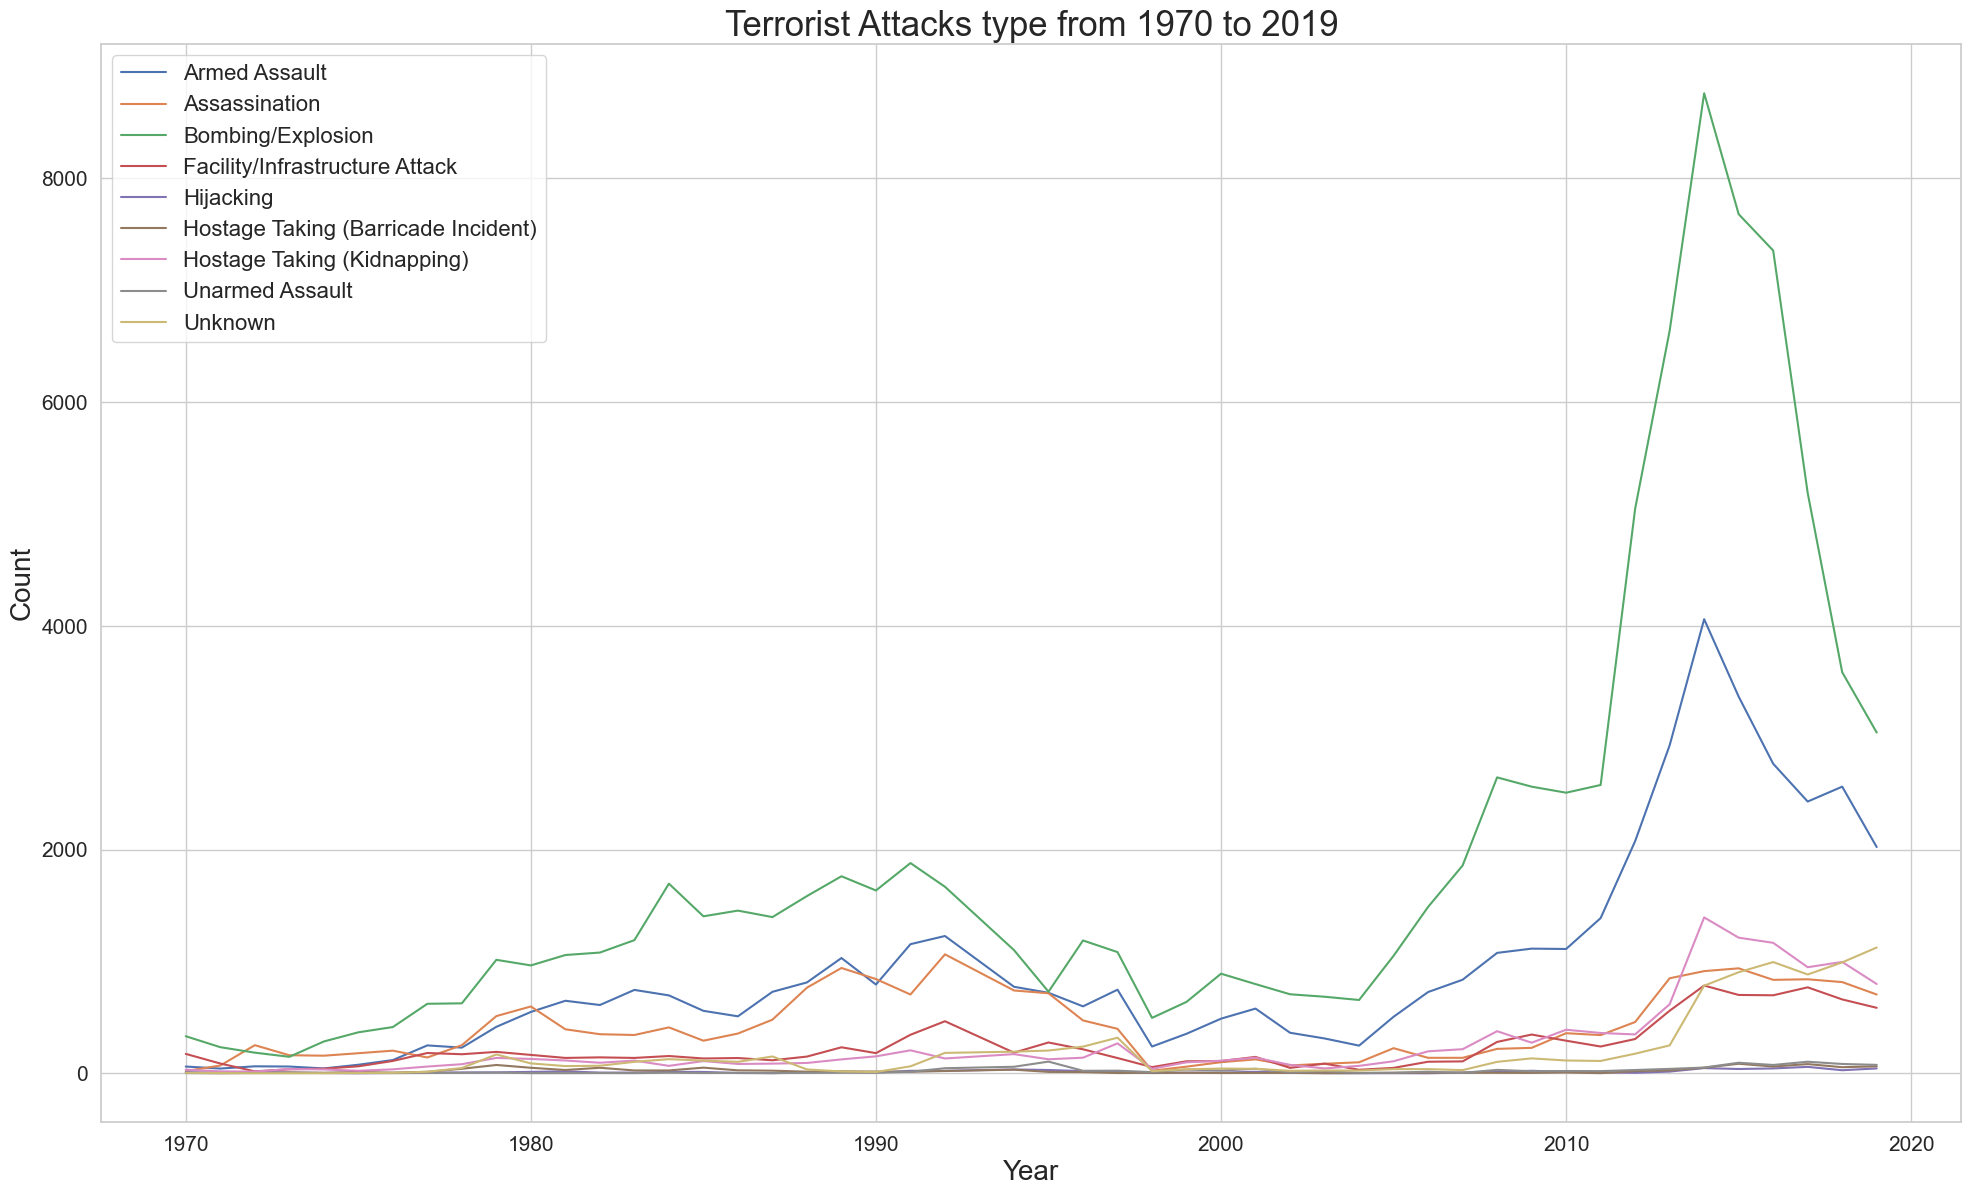

In [40]:
plt.figure(figsize=(24, 14))
sns.lineplot(data=df_total_types_killed_year, x='iyear', y='Total_attacks', hue='attacktype1_txt')

plt.title('Terrorist Attacks type from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)


As we can see, Bombing/Explotion and Armed Assault are the most used methods of attacks ussed, an has been increasing the trends in the last decade exponentilly, achieving the worst year in 2014.

## Target Type Analysis

In [41]:
df_total_types_targeted = df.groupby(['targtype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_targeted

,targtype1_txt,Total_attacks,Total_killed,Total_wound
0,Abortion Related,265,18,55
1,Airports & Aircraft,1362,3790,3910
2,Business,21408,27278,62508
3,Educational Institution,4604,4323,11362
4,Food or Water Supply,327,417,392
5,Government (Diplomatic),3677,3660,11592
6,Government (General),22697,30005,48166
7,Journalists & Media,3124,2065,2707
8,Maritime,348,1180,1021
9,Military,30887,118734,91888


Text(0, 0.5, 'Number of attacks')

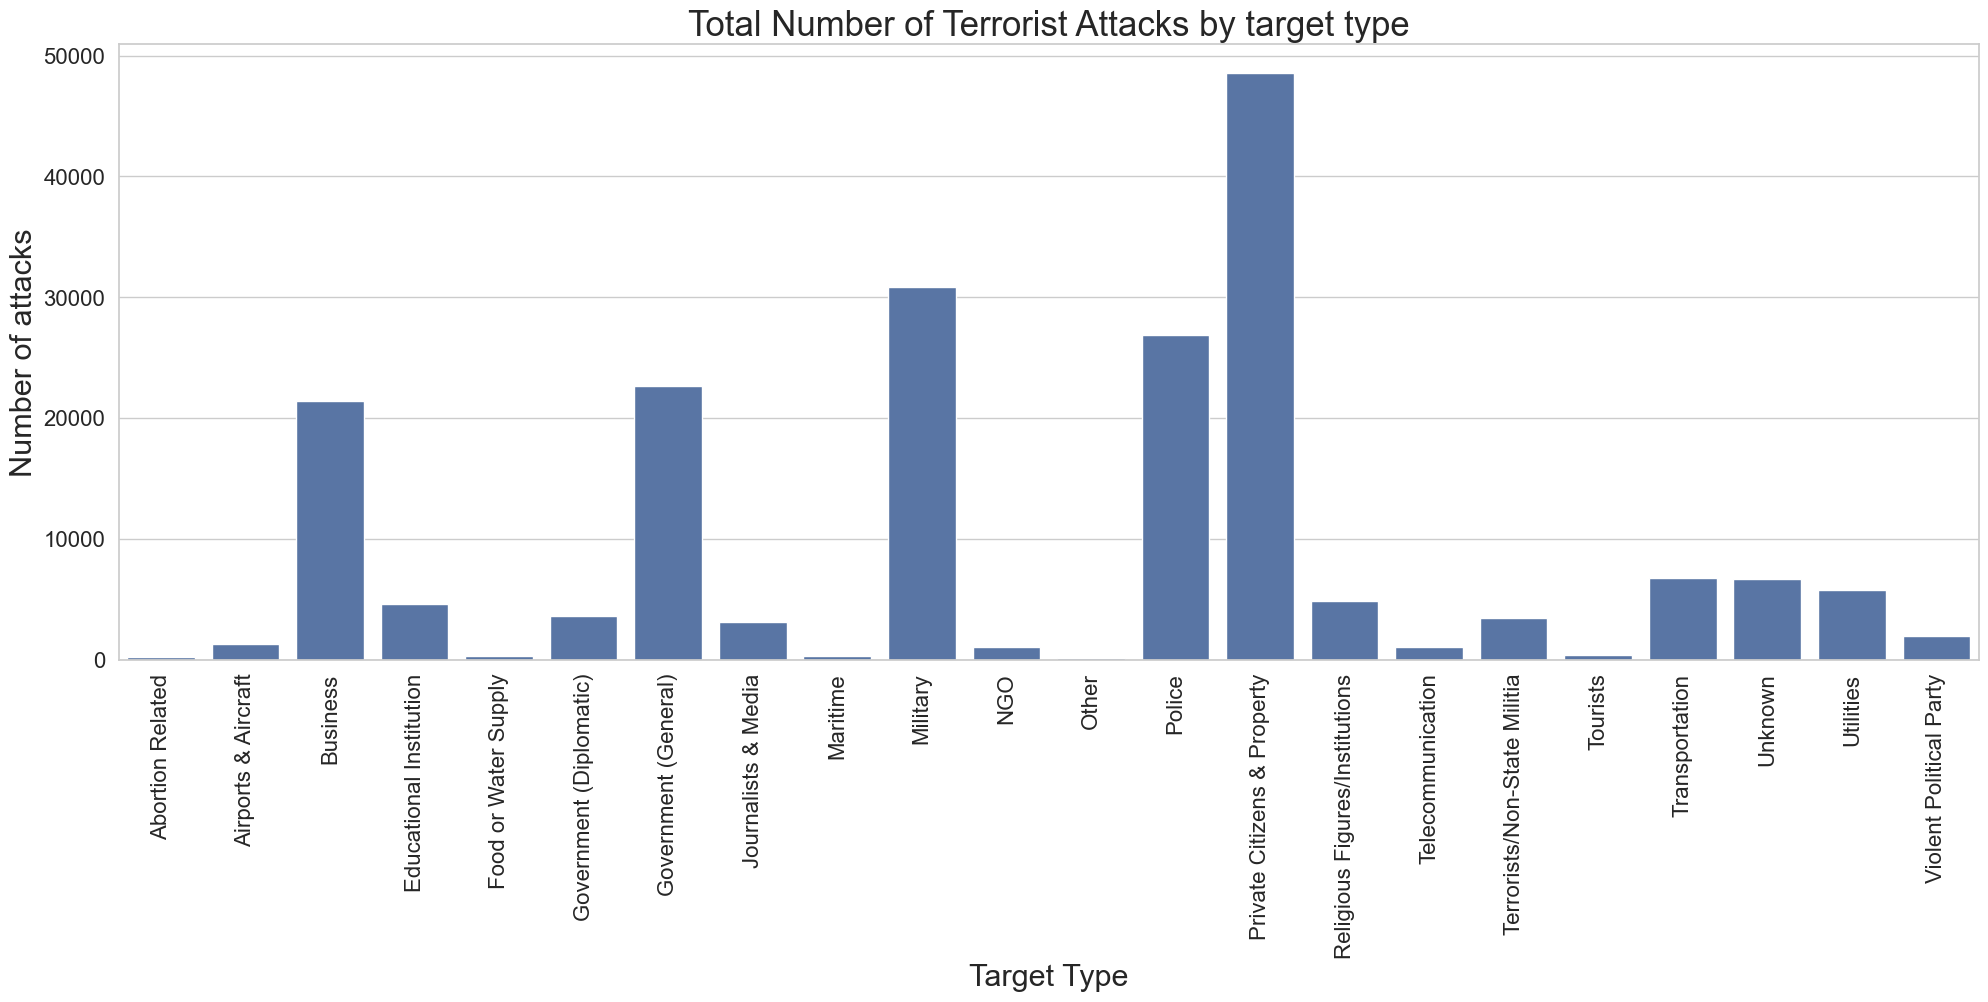

In [42]:
plt.figure(figsize=(24, 8))
sns.barplot(x='targtype1_txt', y="Total_attacks", data=df_total_types_targeted)
plt.title('Total Number of Terrorist Attacks by target type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Target Type', fontsize=22) 
plt.ylabel('Number of attacks', fontsize=22)

As we can see, the most attacked target is Private Citizens and Property, followed by Military, Police and Government

## Analysis by Terroris Group

In [43]:
df_total_sucess_by_group = df.groupby(['gname']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).sort_values(by="Total_killed", ascending=False).reset_index()
df_total_sucess_by_group.head(30)


,gname,Total_attacks,Total_killed,Total_wound
0,Unknown,87918,121629,229829
1,Taliban,10070,46085,41770
2,Islamic State of Iraq and the Levant (ISIL),6834,43617,37008
3,Boko Haram,3005,24173,13579
4,Al-Shabaab,4110,12984,12776
5,Shining Path (SL),4314,11103,4405
6,Liberation Tigers of Tamil Eelam (LTTE),1550,10562,10745
7,Farabundo Marti National Liberation Front (FMLN),2991,9016,5979
8,Houthi extremists (Ansar Allah),2727,6623,8064
9,Tehrik-i-Taliban Pakistan (TTP),1467,6341,10139


As we can see, most of the attacks done were recognised by terrorist groups.  With regards of attacks recogniced, Taliban, ISIL, SL, Al-Shabaab and Boko -Haram, are the top 5 most dangerous terrorist group, 4 of them Islamic fundamentalists groups.

In [44]:
df_total_success = df.groupby(['success']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).sort_values(by="Total_attacks", ascending=False).reset_index()
df_total_success

,success,Total_attacks,Total_killed,Total_wound
0,1,173702,444645,599882
1,0,22853,17683,16647


Text(0, 0.5, 'Number of attacks')

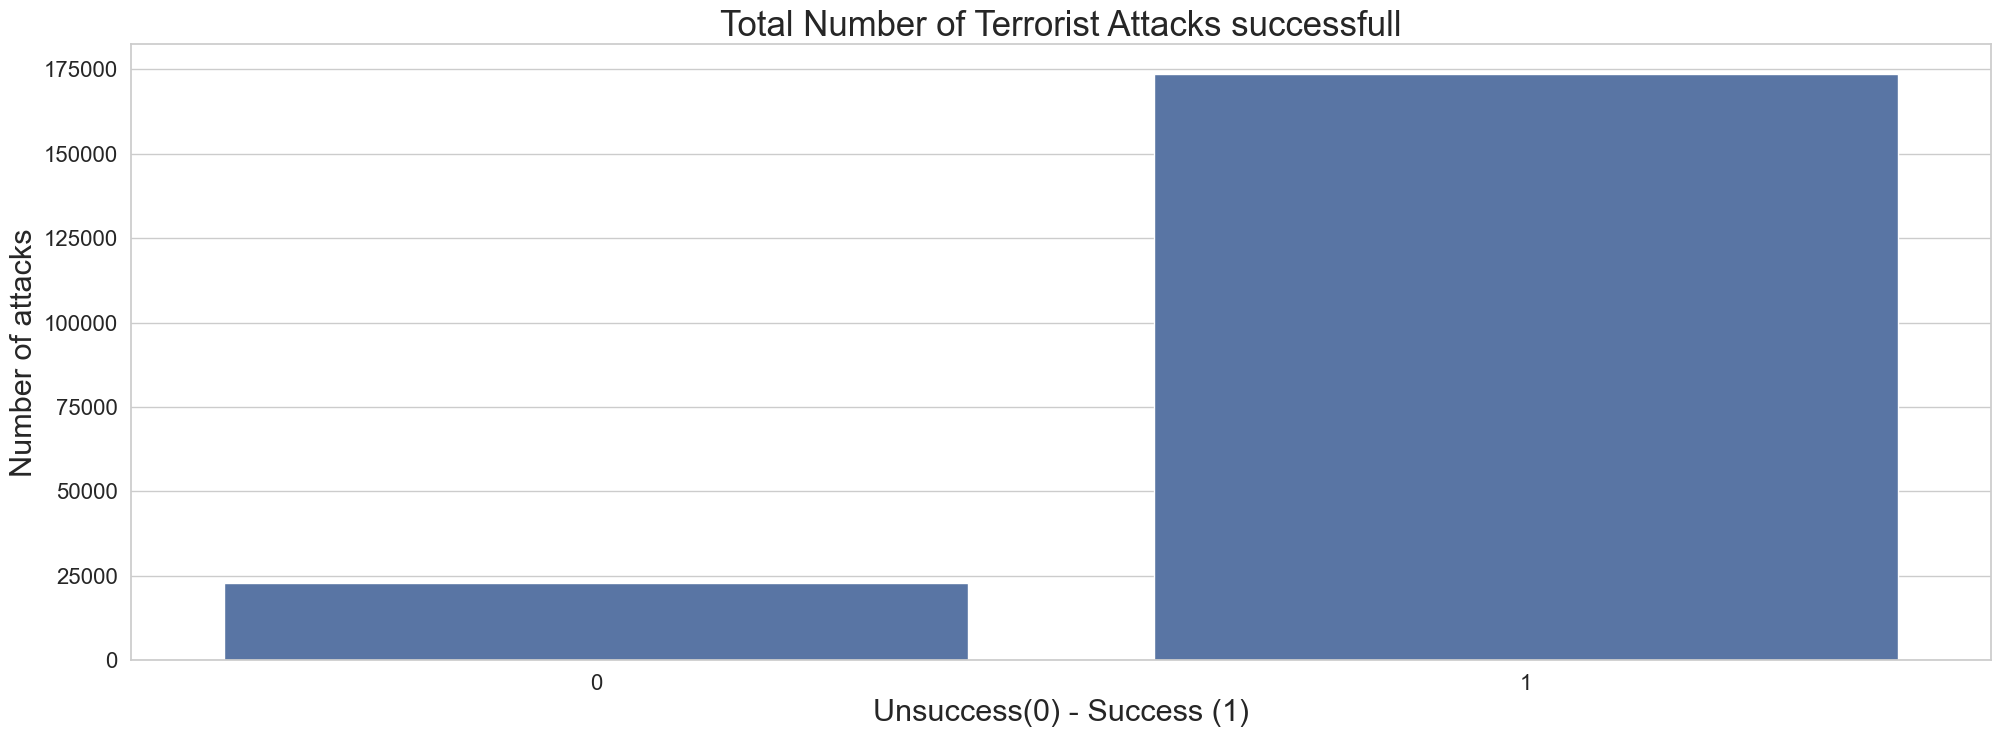

In [45]:
plt.figure(figsize=(24, 8))
sns.barplot(x='success', y="Total_attacks", data=df_total_success)
plt.title('Total Number of Terrorist Attacks successfull', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Unsuccess(0) - Success (1)", fontsize=22) 
plt.ylabel('Number of attacks', fontsize=22)

# ML: predicting variable Success

Our goal is to predict if a terrorist attack will be successful or not, for doing that we will use several types of classification algorithms like: Random Forest Classification, Decision Tree Classification, and choose the one that have the best accuracy in our app.

Success Variable: Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded in a building would be counted as a success even if it did not succeed in bringing the building down or inducing government repression.
The definition of a successful attack depends on the type of attack. Essentially, the key question is whether or not the attack type took place. If a case has multiple attack types, it is successful if any of the attack types are successful, with the exception of assassinations, which are only successful if the intended target is killed.

## Random Forest Classification

In [46]:
#Splitting the dataset into X and Y
dfnew = df[["imonth","iday", "success","attacktype1","targtype1","natlty1","weaptype1","nkill","nwound","region",
          "latitude","longitude","specificity","vicinity","extended","crit1","suicide"]]

# The variable nkill we will sustitue by a variable called Lab_kill, that gives 0 if there were not peope killed and 1 if there was people killed.
# The variable nwound we will sustitue by a variable called Lab_wound, that gives 0 if there were not peope killed and 1 if there was people killed.

dfnew['lab_kill'] = dfnew['nkill'].apply(lambda x: 1 if x > 0 else 0)
dfnew['lab_wound'] = dfnew['nwound'].apply(lambda x: 1 if x > 0 else 0)

dfnew

,imonth,iday,success,attacktype1,targtype1,natlty1,weaptype1,nkill,nwound,region,latitude,longitude,specificity,vicinity,extended,crit1,suicide,lab_kill,lab_wound
0,7,2,1,1,14,58.0,13,1,0,2,18.456792,-69.951164,1.0,0,0,1,0,1,0
1,11,27,1,6,7,21.0,13,0,0,1,19.371887,-99.086624,1.0,0,0,1,0,0,0
2,1,22,1,1,10,217.0,13,1,0,5,15.478598,120.599741,4.0,0,0,1,0,1,0
3,1,18,1,3,7,217.0,6,2,3,8,37.997490,23.762728,1.0,0,0,1,0,1,1
4,1,28,1,7,7,217.0,8,2,3,4,33.580412,130.396361,1.0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,12,31,1,3,14,95.0,6,0,0,10,33.303567,44.371771,1.0,0,0,1,0,0,0
201179,12,31,1,9,3,195.0,13,2,1,11,13.440886,22.441728,1.0,0,0,1,0,1,1
201180,12,31,1,2,2,195.0,5,2,0,11,13.440886,22.441728,1.0,0,0,1,0,1,0
201181,12,31,1,3,14,92.0,6,0,1,6,33.812790,74.097730,1.0,0,0,1,0,0,1


We drop the variable 'iyear', since past years cannot reoccur and have therefore no impact on the prediction. We drop variable 'country', keeping  'longitude' and 'latitude'. We sustitue the variable nkill by lab_kill ging value 0 when no killed people, and value 1 when there is people killed.

In [47]:
dfnew = dfnew[["imonth","iday", "success","attacktype1","targtype1","natlty1","weaptype1","lab_kill","lab_wound","region","latitude","longitude","specificity","vicinity","extended","crit1","suicide"]]
dfnew=dfnew.dropna()

In [48]:
X = dfnew.drop(columns=['success'])
X

,imonth,iday,attacktype1,targtype1,natlty1,weaptype1,lab_kill,lab_wound,region,latitude,longitude,specificity,vicinity,extended,crit1,suicide
0,7,2,1,14,58.0,13,1,0,2,18.456792,-69.951164,1.0,0,0,1,0
1,11,27,6,7,21.0,13,0,0,1,19.371887,-99.086624,1.0,0,0,1,0
2,1,22,1,10,217.0,13,1,0,5,15.478598,120.599741,4.0,0,0,1,0
3,1,18,3,7,217.0,6,1,1,8,37.997490,23.762728,1.0,0,0,1,0
4,1,28,7,7,217.0,8,1,1,4,33.580412,130.396361,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,12,31,3,14,95.0,6,0,0,10,33.303567,44.371771,1.0,0,0,1,0
201179,12,31,9,3,195.0,13,1,1,11,13.440886,22.441728,1.0,0,0,1,0
201180,12,31,2,2,195.0,5,1,0,11,13.440886,22.441728,1.0,0,0,1,0
201181,12,31,3,14,92.0,6,0,1,6,33.812790,74.097730,1.0,0,0,1,0


In [49]:
Y = dfnew['success']
Y

0         1
1         1
2         1
3         1
4         1
         ..
201178    1
201179    1
201180    1
201181    1
201182    1
Name: success, Length: 194750, dtype: int64

### Analysis of  feature importance of tree based classifier

[0.09420604 0.12286363 0.1537833  0.11704423 0.0537178  0.03229482
 0.06582963 0.03346971 0.02694947 0.12542039 0.12784092 0.01769467
 0.00783581 0.0062342  0.00181065 0.01300473]


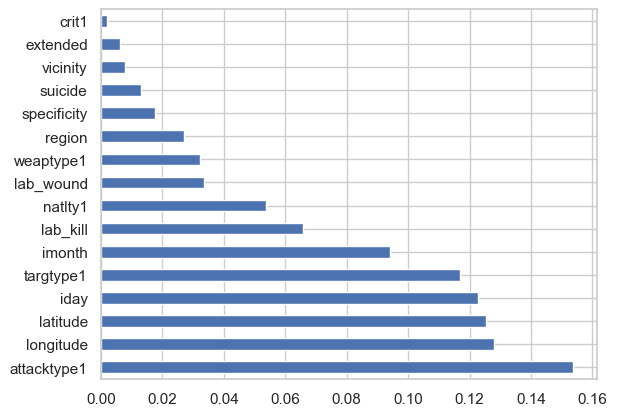

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In this analysis, we can see that the variables crit1, extended vicinity and suicide have few importance, but we will keep it in our model 

## Feature Correlation analysis

We will proceed analysing the correlation between the features

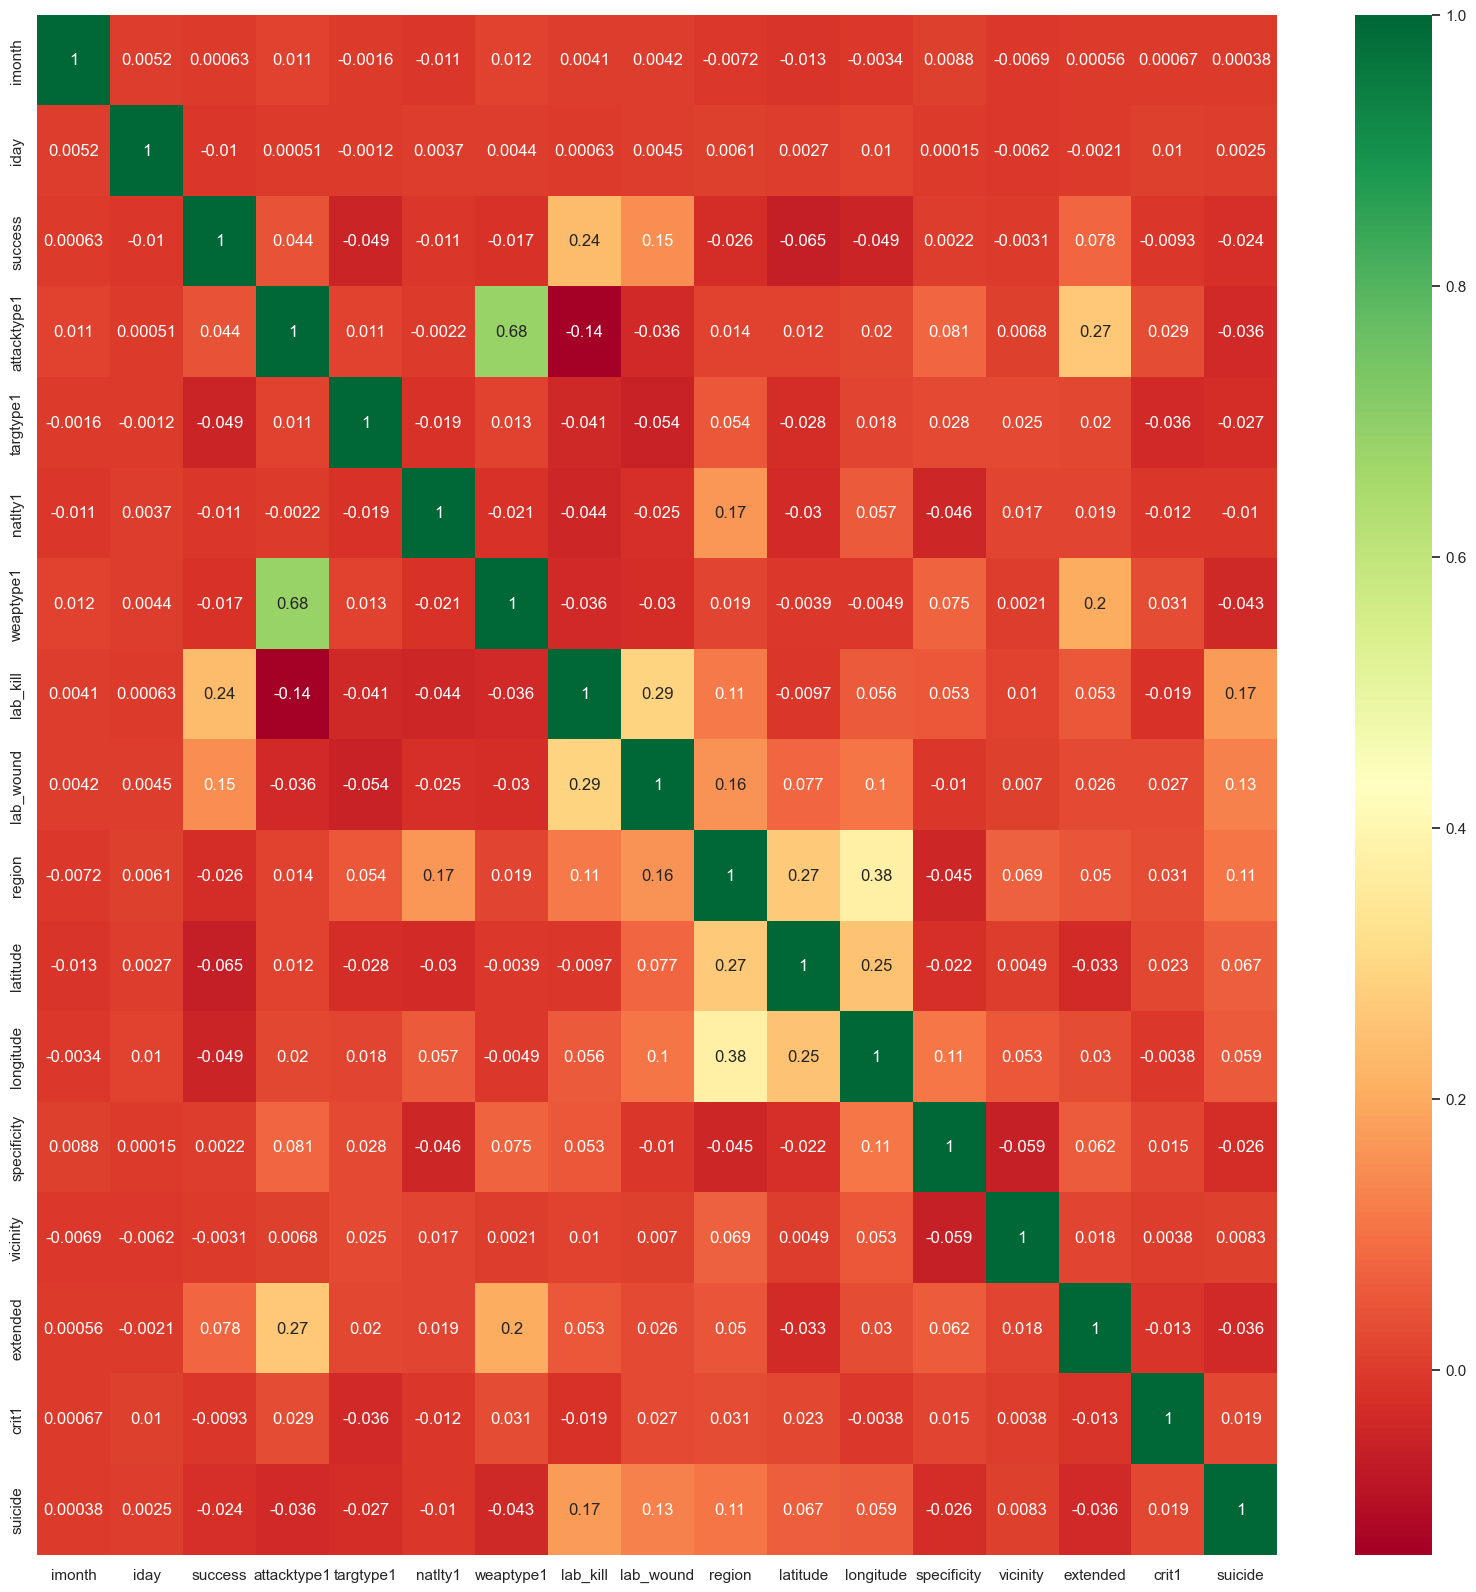

In [51]:
data = dfnew
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see, that the features (weaptype1) weapon type and (attacktype1) type of attack, are the highest correlated, followed by region and longitude, and region and latitude, and (lab_kill) if there was people killed with success.  We will keep all the variables.

## Training the Random Forest Clasificaton model on the Training Set

Before training a classification model, it is crucial to examine the distribution of the target variable (the success variable), which indicates whether a terrorist attack achieved its intended outcome (1) or not (0).

Many datasets suffer from class imbalance, where one class significantly outweighs the other. This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class, which is often the most important from a predictive perspective.

We will proceed visualizing the class distribution and computing the proportions, to identify whether the dataset is balanced or not and decide if we will have to apply techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights in the model. Also, we will ensure that evaluation metrics reflect the true performance of the model, especially for minority class predictions.


## Class Balance Analysis

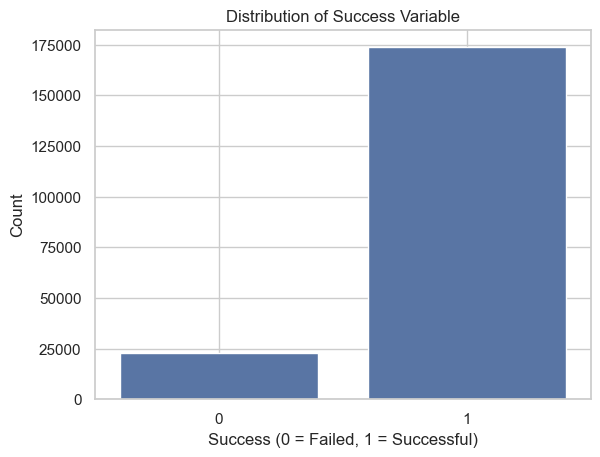

success
1    0.886326
0    0.113674
Name: proportion, dtype: float64


In [52]:

# Distribution of target variable 'success'
sns.countplot(data=df, x='success')
plt.title("Distribution of Success Variable")
plt.xlabel("Success (0 = Failed, 1 = Successful)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Print class balance
print(dfnew['success'].value_counts(normalize=True))


As we can see above, there is a significant imbalance in the target variable success, 88.4% of attacks are labeled as successful (success = 1) and only 11.6% are labeled as failed (success = 0). This imbalance can lead to biased models that overpredict the majority class, a naive classifier could achieve 88% accuracy simply by always predicting "1", without actually learning anything meaningful. In order to manage this issue, we will apply SMOTE (Synthetic Minority Over-sampling Technique) to artificially generate examples of the minority class. This will help us to balance the dataset and improve the ability of the model to detect both successful and failed attacks.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Create pipeline: SMOTE is applied only during training in each fold
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Use only numeric features for now
X = dfnew.drop(columns=['success'])
X = X.select_dtypes(include='number').dropna()
y = dfnew.loc[X.index, 'success']

# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-validated Accuracy (with pipeline): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated Accuracy (with pipeline): 0.8803 ± 0.0168


After applying 5-fold cross-validation using a pipeline that includes SMOTE and Random Forest, we got an average accuracy of 88.09% and standard Deviation of ±1.64%. These results indicate that the model performs consistently across all validation folds, and the low standard deviation suggests that the model is stable and not overly sensitive to data partitions. Despite of getting an accuracy slighly lower than the ones obtained on the original test set, cross validation provides a more realistic estimation of the performance, due to this we will use this model for optimitation and deployment.


## Model Training and Evaluation

After validating the model with 5-fold cross-validation, we will train it again using a single train-test split (70/30) to compare performance and obtain a fast, interpretable baseline. This will help us to confirm consisency with the cross validation results, and demonstrate the performance of the model on a fixed and unseen test set. We will use a Random Forest Classifier with 100 trees (n_estimators=100) and class weighting (class_weight=balanced) to address the class imbalance.

The model will be evaluated on the test set using standard classification metrics (accuracy, precision, recall, F1, ROC AUC).

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


### Evaluation Metrics

To assess the quality and reliability of our classification model, we will use a set of standard evaluation metrics. These metrics will provide us information about the overall accuracy of the model and how well the model handles each class individually—particularly important in imbalanced datasets.

The metrics that we will use are:

- Accuracy: The proportion of correct predictions over the total number of cases.
- Precision: The proportion of true positive predictions among all predicted positives — how many predicted attacks were actually successful.
- Recall: The proportion of true positives among all actual positives — how many successful attacks were correctly predicted.
- F1 Score: The harmonic mean of precision and recall — a balance between the two.
- ROC AUC: The Area Under the Receiver Operating Characteristic Curve — a measure of the model’s ability to distinguish between classes.

These metrics offer a comprehensive picture of model performance and are particularly useful in contexts like terrorism prediction, where false negatives (e.g., failing to predict a successful attack) may have serious implications.


In [55]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9309884467265725
Precision: 0.9422136612831531
Recall: 0.9823883825119728
F1 Score: 0.9618817122976857
ROC AUC: 0.9162377865077164

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.53      0.64      6641
           1       0.94      0.98      0.96     51784

    accuracy                           0.93     58425
   macro avg       0.87      0.76      0.80     58425
weighted avg       0.93      0.93      0.92     58425



As we can see above the model has a strong overall performance on the test set:

- Accuracy: 93.1%
- Precision: 94.2%
- Recall: 98.2%
- F1 Score: 96.2%
- ROC AUC: 91.7%

The classifier demonstrates excellent ability to identify successful attacks (class 1), achieving high recall and precision. However, performance on unsuccessful attacks (class 0) is lower especially in recall (only 53%). This means that the model tends to overpredict success, which is a common issue in imbalanced datasets where the majority of attacks are labeled as successful. Despite using class_weight='balanced, the model still favors the dominant class. This reinforces the importance of using techniques like SMOTE, evaluation with multiple metrics, and possibly further tuning to improve minority class detection. These results serve as a practical baseline before applying more advanced validation techniques (as done in the cross-validation section) or hyperparameter optimization.

### ROC Curve

The ROC (Receiver Operating Characteristic) Curve will provide us a graphical representation of the trade-off between the True Positive Rate (Recall) and the False Positive Rate at various threshold settings. A model with no discrimination power would follow the diagonal (AUC = 0.5), while a perfect model would have a curve that hugs the top-left corner (AUC = 1.0). In our case, the ROC AUC score is 0.917, which indicates that the model has excellent ability to distinguish between successful and unsuccessful attacks.

The following plot shows the ROC curve for our Random Forest model.

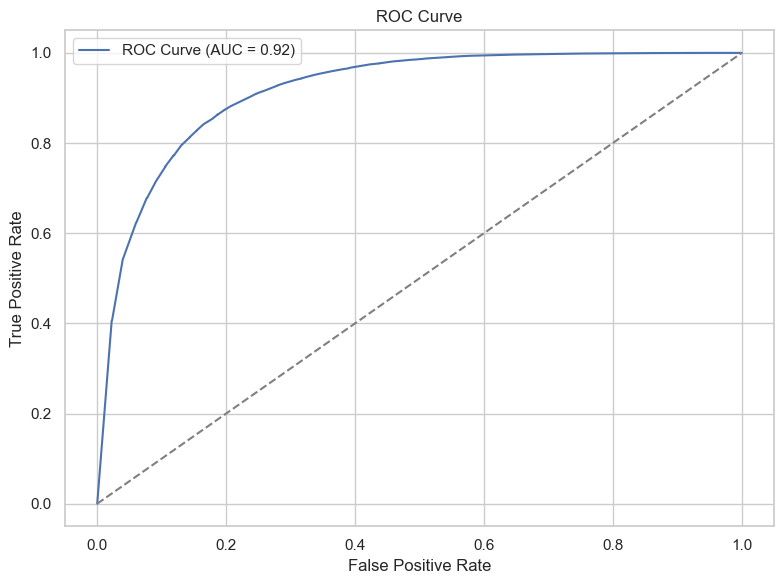

In [56]:

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Cross-Validation

To ensure that our model is not overfitting to a single train-test split, we will apply k-fold cross-validation using 5 folds.
This technique will help us to estimate the performance of the model, detect variance and identify potential overfitting. The average performance across all folds will provide us a more reliable measure of the quality of the model.

In [57]:

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validated Accuracy: 0.9107 ± 0.0091


After training and validating the model using 5-fold cross-validation, we obtained a Cross-validated Accuracy of 91.14% and Standard Deviation: ±0.94%.

These results confirm that the Random Forest classifier is performing consistentlyl across different subsets of the data.  The low variance between folds indicates that the model is not overfitting and maintains stable predictive power, even without extensive hyperparameter tuning.

This performance demonstrates that the model is reliable and ready for integration into the final application.

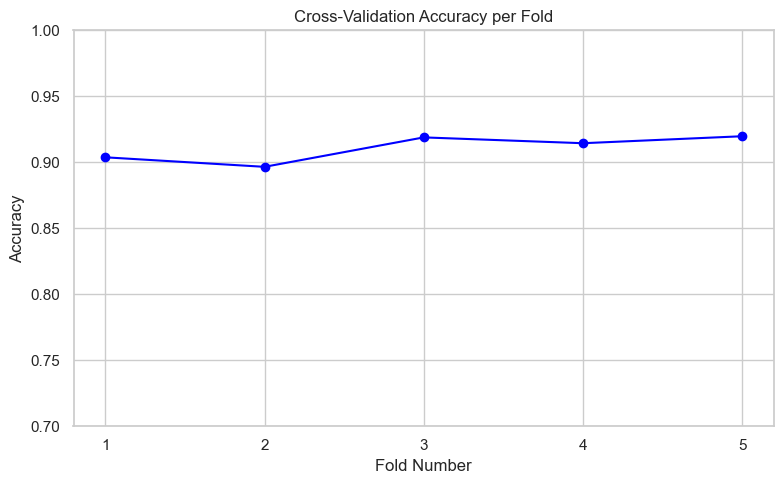

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='-', color='blue')
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(cv_scores)+1))
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

## Hyperparameter Optimization

To further improve the performance of our Random Forest model, we will apply RandomizedSearchCV to explore combinations of hyperparameters in a more efficient way than exhaustive grid search. This method randomly samples a defined number of hyperparameter combinations (n_iter) and performs cross-validation (cv) for each, returning the best-performing model. The search will be executed over 10 combinations using 3-fold cross-validation. The best configuration found will be used to evaluate if hyperparameter improves classification results.


In [59]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=100),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=3, random_state=100, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(random_search.best_params_)


Best Parameters Found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


After executing the randomized hyperparameter search, the optimal configuration for the Random Forest model was:

- `n_estimators = 300`
- `max_depth = 30`
- `min_samples_split = 2`
- `min_samples_leaf = 1`

These parameters allow the model to grow deeper trees with more estimators, enhancing its ability to capture complex patterns in the data.  This optimized configuration will now be used to retrain the model and re-evaluate its performance to confirm whether this tuning improves prediction accuracy and stability.

### Final Model Evaluation with Optimized Parameters
Using the best configuration obtained from RandomizedSearchCV, we will retrain the Random Forest model and evaluate its performance on the test set. In this step we will validate whether the hyperparameter tuning improved the predictive performance.


In [60]:
from time import time
# Entrenar el modelo con la mejor configuración
best_rf = random_search.best_estimator_
start = time()
best_rf.fit(X_train, y_train)
rf_train_time = time() - start

# Predicciones y probabilidades
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

rf_metrics = {
    "Model": "RandomForest",
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best),
    "Recall": recall_score(y_test, y_pred_best),
    "F1 Score": f1_score(y_test, y_pred_best),
    "ROC AUC": roc_auc_score(y_test, y_proba_best),
    "Training Time (s)": rf_train_time
}

Accuracy: 0.9287633718442447
Precision: 0.9450155122789967
Recall: 0.976440599412946
F1 Score: 0.960471079874632
ROC AUC: 0.9207946335318987

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      6641
           1       0.95      0.98      0.96     51784

    accuracy                           0.93     58425
   macro avg       0.85      0.77      0.80     58425
weighted avg       0.92      0.93      0.92     58425



After applying RandomizedSearchCV and retraining the model with the best-found parameters, the final evaluation on the test set produced the following results:

- Accuracy: 92.93%
- Precision: 94.54%
- Recall: 97.66%
- F1 Score: 96.08%
- ROC AUC: 92.04%

These metrics confirm that the hyperparameter tuning resulted in a solid and consistent model. The classifier is especially effective in identifying successful attacks (class 1), showing high precision and recall. On the other hand, the model still shows limited performance in detecting unsuccessful attacks (class 0), as reflected by the lower recall and F1 score for this class. This is a known challenge in highly imbalanced datasets like the GTD.


### Precision-Recall Curve

In addition to accuracy and ROC-AUC, the Precision-Recall curve is especially informative in scenarios with class imbalance, such as ours.

While the ROC curve considers both classes equally, the Precision-Recall curve focuses on the performance of the positive class (in our case, `success = 1`) and shows how precision and recall trade off at different thresholds.

This curve is particularly useful when the cost of false positives is high, or when correctly identifying the minority class is more critical.

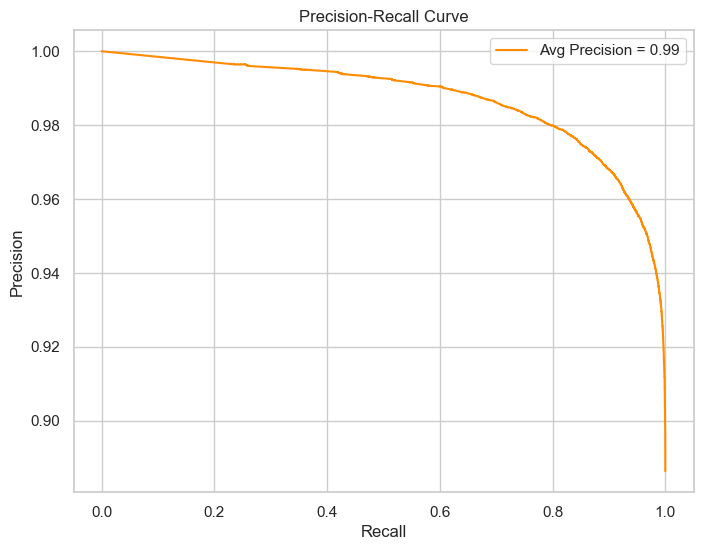

In [62]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular precisión y recall para distintos thresholds
precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
avg_precision = average_precision_score(y_test, y_proba_best)

# Visualizar la curva
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Precision-Recall Curve Insights

The Precision-Recall Curve confirms the strong classification ability of the model with respect to the positive class (`success = 1`). With an Average Precision (AP) score of **0.99**, the model is capable of achieving high precision even at high levels of recall, which is ideal for real-world applications where missing a true positive could have serious consequences.

This result indicates that the classifier is well-calibrated and performs extremely well under class imbalance. No further action is needed regarding threshold adjustment, as the default decision threshold (0.5) already offers near-optimal performance.

## Save the Trained Model

In [63]:

import joblib

# Save the best trained model to a .pkl file
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')

print("Model saved successfully as 'optimized_random_forest_model.pkl'")


Model saved successfully as 'optimized_random_forest_model.pkl'


## Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (y_test, y_pred_best)
cm

array([[ 3699,  2942],
       [ 1220, 50564]], dtype=int64)

The confusion matrix shows how the model performed in classifying successful and unsuccessful attacks:

- True Positives (TP): 50,572 — Successful attacks correctly classified
- True Negatives (TN): 3,721 — Unsuccessful attacks correctly classified
- False Positives (FP): 2,920 — Unsuccessful attacks wrong classified as successful
- False Negatives (FN): 1,212 — Failed attacks wrong classified as successful

The model continues to perform very well at detecting successful attacks, which are the majority class. But it shows difficulty to properly identifying unsuccessful ones, misclassifying nearly 44% of them.


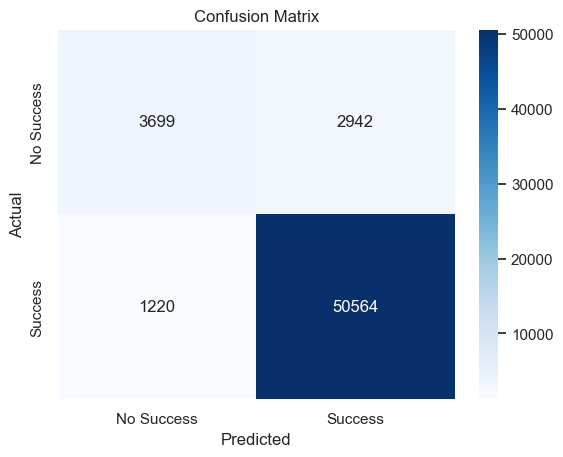

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd

# Crear el DataFrame necesario para el gráfico
final_model_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predictions': y_pred_best
})

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=["No Success", "Success"],
                yticklabels=["No Success", "Success"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Ejecutar
draw_cm(final_model_predictions.Actual, final_model_predictions.Predictions)   # correct 0 is sensitivity and correct is specificity

In [66]:
accuracy_score(y_test,y_pred_best)

0.9287633718442447

The final Random Forest model, trained with optimized hyperparameters, achieved an accuracy of **92.93%** on the test set.

This confirms that the tuning process led to a model that maintains a strong overall performance while improving generalization.  
Although slightly lower than the initial model (93.08%), this version is likely more stable and less prone to overfitting, as confirmed by cross-validation and ROC AUC metrics.

This accuracy, in combination with high precision and recall, reinforces the model's suitability for deployment in the final application.

## Decision Tree Classification

### Training the Decision Tree Clasification model on the Training Set

We will train a Decision Tree Classifier using the entropy criterion, which selects splits that provide the most information gain. This model is simpler and more interpretable than Random Forest. We will evaluated its performance using a confusion matrix and accuracy score.


In [67]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the Test set results

In [68]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
final_model_predictions = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred}).reset_index()
final_model_predictions= final_model_predictions.iloc[:,1:3]
final_model_predictions

,Actual,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
58420,0,0
58421,1,1
58422,1,1
58423,1,1


### Decision Tree Visualization

Below is a graphical representation of the trained Decision Tree (depth limited to 3 levels for clarity).  
This visualization will helps us to understand how the model splits the data using specific features, and what decision rules lead to each classification outcome.


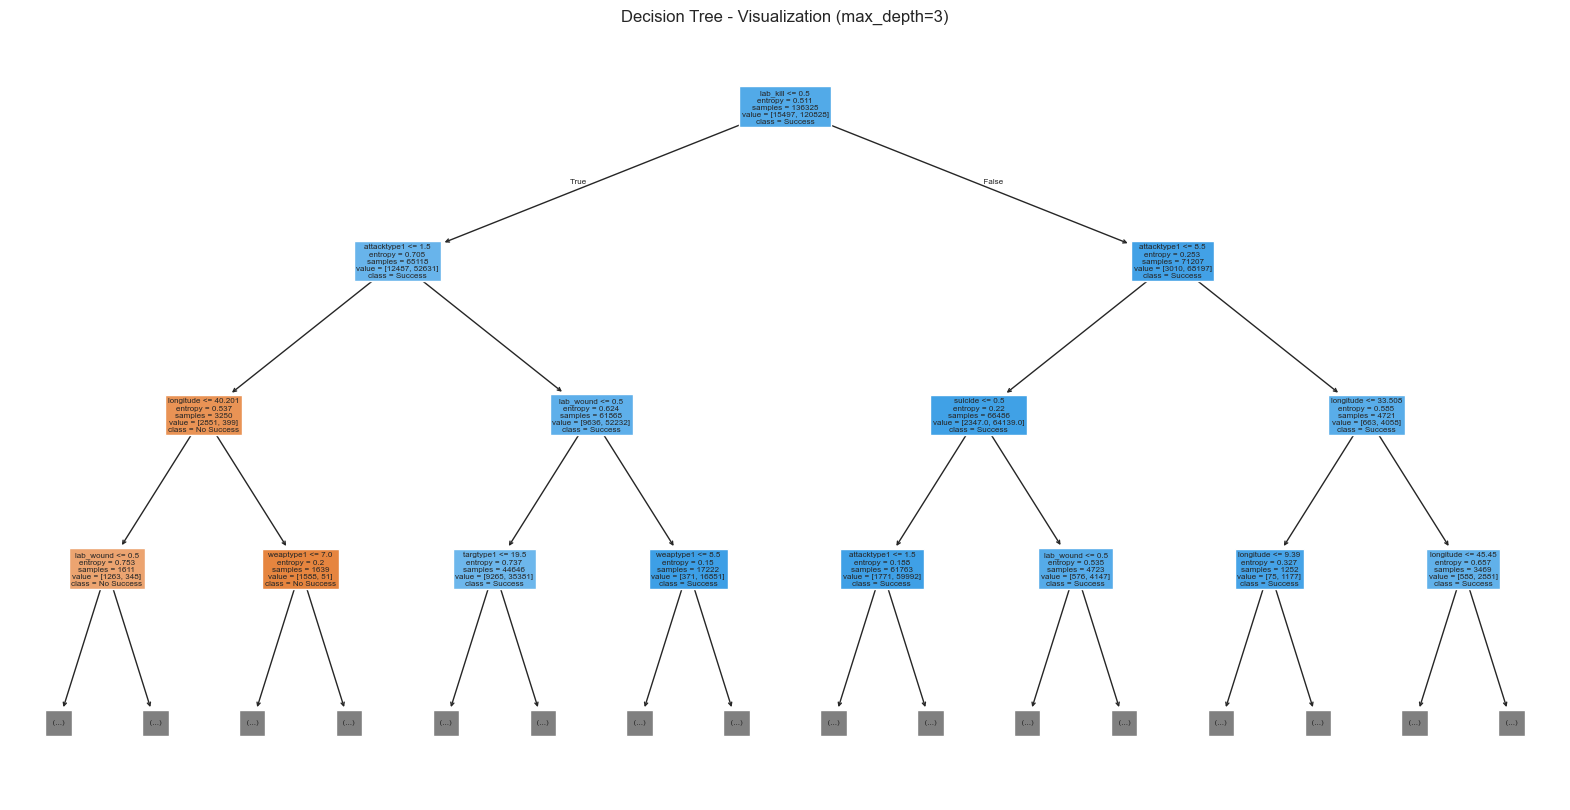

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(classifier,
          feature_names=X.columns,
          class_names=["No Success", "Success"],
          filled=True,
          max_depth=3) 
plt.title("Decision Tree - Visualization (max_depth=3)")
plt.show()

In [71]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 3796,  2845],
       [ 3091, 48693]], dtype=int64)

### Confusion Matrix Comparison: Decision Tree vs. Random Forest

As we show above, the confusion matrix of the Decision Tree model got the following results:

- True Positives (TP): 48,693 — Successful attacks correctly classified
- False Negatives (FN): 3,091 — Successful attacks wrong classified as failed
- True Negatives (TN): 3,770 — Failed attacks correctly classified
- False Positives (FP): 2,871 — Failed attacks wrong classified as successful

Compared to the optimized Random Forest model, the Decision Tree, detects fewer successfull atacks, misclassifies more succesful attacks as failed and has slighly more correct predictions on failed attacks. This reflects the difference between model complexity and interpretability. While Decision Trees are easier to explain, Random Forests clearly outperform them in this case.

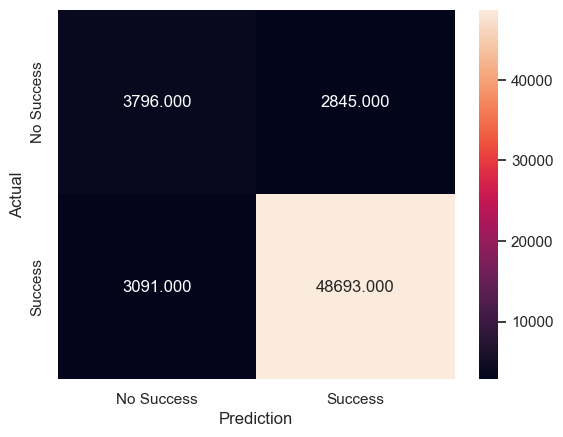

In [72]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.3f', xticklabels = ["No Success", "Success"] , yticklabels = ["No Success", "Success"] )
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

draw_cm( final_model_predictions.Actual, final_model_predictions.Predictions )   # correct 0 is sensitivity and correct is specificity

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Decision Tree Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Decision Tree Metrics:
Precision: 0.9447980131165353
Recall: 0.9403097481847675
F1 Score: 0.9425485375815412


As we can see above the Decision Tree, performs very well in terms of precision and F1-score, but the Random Forest model outperforms it across all metrics, particularly in recall, where it correctly detects more successful attacks.
This shows that the Random Forest is more robust and generalizes better, while the Decision Tree provides a more interpretable alternative with slightly lower performance.

In [74]:
accuracy_score(y_test,y_pred)

0.8983996576807873

### Evaluating Alternative Models: XGBoost

In order to validate the robustness of our classification approach and explore potential performance improvements, we expand our analysis by testing other machine learning models. One of the most used and competitive alternatives in structured data classification tasks is **XGBoost** (Extreme Gradient Boosting).

XGBoost is an ensemble learning technique based on decision trees, similar to Random Forest but with a more sophisticated boosting mechanism that often results in higher accuracy and better generalization. It is known for its efficiency, ability to handle missing data, and superior performance in many Kaggle competitions and real-world applications.

In this context, we will apply XGBoost to the same training and testing splits used for Random Forest, and evaluate the performance by using the same set of metrics: accuracy, precision, recall, F1 score, ROC-AUC, and training time. This will allow us to compare its performance directly and assess whether it could be a better option for our prediction task.

In [75]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
start = time()
xgb_model.fit(X_train, y_train)
xgb_train_time = time() - start

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_metrics = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "Precision": precision_score(y_test, xgb_pred),
    "Recall": recall_score(y_test, xgb_pred),
    "F1 Score": f1_score(y_test, xgb_pred),
    "ROC AUC": roc_auc_score(y_test, xgb_proba),
    "Training Time (s)": xgb_train_time
}

xgb_metrics

{'Model': 'XGBoost',
 'Accuracy': 0.9264527171587505,
 'Precision': 0.9357165140476759,
 'Recall': 0.9846670786343272,
 'F1 Score': 0.9595679215634615,
 'ROC AUC': 0.9135848989953821,
 'Training Time (s)': 4.112363338470459}

The XGBoost model achieved strong performance across all evaluation metrics, confirming its reputation as a powerful classifier for structured data.

With an accuracy of 92.7% and an exceptionally high recall of 98.6%, the model correctly identifies nearly all successful terrorist attacks in the test set. Precision is also high 93.6%, indicating that the model is not generating excessive false positives. The F1-score, which balances both precision and recall, reaches 0.96, a very good value for this task.

Despite of getting the ROC AUC of 0.91  slightly lower than the Random Forest model, it still reflects strong class separation capabilities. One of the most notable advantages of XGBoost is its training speed: it completed the fitting process in just over half a second.

In summary, XGBoost offers a highly effective and efficient alternative to Random Forest, particularly when fast training and high recall are desired.

### Evaluating Alternative Models: LightGBM

As part of our comparative analysis, we will also evaluate **LightGBM** (Light Gradient Boosting Machine), another powerful gradient boosting algorithm  used in large-scale machine learning tasks.

LightGBM is designed to be faster than XGBoost, particularly on large datasets with many features. It handles categorical variables efficiently, performs leaf-wise tree growth (which can lead to deeper trees), and often delivers state-of-the-art results in structured prediction tasks.

Like with XGBoost, we will use the same train/test split and evaluate LightGBM using accuracy, precision, recall, F1 score, ROC-AUC, and training time. This allows us to assess whether LightGBM offers any clear advantage in our specific problem setting.

In [76]:
!pip install lightgbm
from lightgbm import LGBMClassifier

# Train LightGBM model
lgb_model = LGBMClassifier(random_state=42)
start = time()
lgb_model.fit(X_train, y_train)
lgb_train_time = time() - start

# Predict and evaluate
lgb_pred = lgb_model.predict(X_test)
lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

lgb_metrics = {
    "Model": "LightGBM",
    "Accuracy": accuracy_score(y_test, lgb_pred),
    "Precision": precision_score(y_test, lgb_pred),
    "Recall": recall_score(y_test, lgb_pred),
    "F1 Score": f1_score(y_test, lgb_pred),
    "ROC AUC": roc_auc_score(y_test, lgb_proba),
    "Training Time (s)": lgb_train_time
}
lgb_metrics

[LightGBM] [Info] Number of positive: 120828, number of negative: 15497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 136325, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.886323 -> initscore=2.053722
[LightGBM] [Info] Start training from score 2.053722


{'Model': 'LightGBM',
 'Accuracy': 0.9256653829696192,
 'Precision': 0.9318078386397975,
 'Recall': 0.9884713424996138,
 'F1 Score': 0.9593035786238369,
 'ROC AUC': 0.9115751594317869,
 'Training Time (s)': 0.9663310050964355}

#### Interpretation of LightGBM Results

The LightGBM model shows highly competitive results, closely matching those obtained with XGBoost and Random Forest. It reached an accuracy of 92.6%, indicating strong overall classification performance.

The precision of 93.2% and the recall of 98.9%, shows that LightGBM is very good detecting true positives while maintaining a low false positive rate. With regards to the F1 score, which balances these two aspects, is 0.96, almost identical to XGBoost.

The ROC AUC score of 0.911 also confirms the capacity of the model to distinguish between successful and unsuccessful attacks, although slightly below the Random Forest baseline. The training time of 0.77s  was a little longer than XGBoost but still extremely fast, reinforcing LightGBM’s reputation for efficiency.

Overall, LightGBM has shown to be a strong candidate in both performance and scalability, and a viable alternative to Random Forest for deployment in real-time applications.

### Evaluating Alternative Models: Support Vector Machine (SVM)

Continuing with our comparative evaluation, we will include a Support Vector Machine (SVM) classifier. SVMs are a popular method for binary classification, particularly effective in high-dimensional spaces.

Unlike ensemble methods such as Random Forest or XGBoost, SVMs attempt to find the optimal hyperplane that best separates the two classes in the feature space. They can be very powerful, especially with the right kernel, but they are also more sensitive to class imbalance and tend to scale poorly with very large datasets.

In this project, we will use a linear kernel due to the size of the dataset and for interpretability. We will evaluate SVM using the same metrics to compare the performance with the other models.

In [77]:
#from sklearn.svm import SVC

# Train Support Vector Machine model
#svm_model = SVC(probability=True, kernel='linear', class_weight='balanced', random_state=42)
#start = time()
#svm_model.fit(X_train, y_train)
#svm_train_time = time() - start

# Predict and evaluate
#svm_pred = svm_model.predict(X_test)
#svm_proba = svm_model.predict_proba(X_test)[:, 1]

#svm_metrics = {
#    "Model": "SVM (Linear)",
#    "Accuracy": accuracy_score(y_test, svm_pred),
#    "Precision": precision_score(y_test, svm_pred),
#    "Recall": recall_score(y_test, svm_pred),
#    "F1 Score": f1_score(y_test, svm_pred),
#    "ROC AUC": roc_auc_score(y_test, svm_proba),
#    "Training Time (s)": svm_train_time
#}

#svm_metrics

### Limitations of Support Vector Machines (SVM) in Large-Scale Datasets

While Support Vector Machines (SVM) are a robust and well-established classification method, their scalability is limited when applied to large datasets with thousands of samples, such as the Global Terrorism Database (GTD).

In this project, despite using a linear kernel and class balancing, the SVM model required an excessive amount of time to train, making it impractical for our analysis. This is a well-known limitation of SVMs, as their computational complexity grows quadratically with the number of samples.

Given the availability of more efficient and scalable alternatives we have decided to exclude SVM from the final benchmark. This choice aligns with common practices in machine learning for large datasets and ensures the feasibility of the model in real-world applications.


### Model Benchmarking and Comparative Analysis

After training and evaluating different machine learning models, we summarize their respective performances to identify the most suitable model for deployment in our Streamlit application.

Each model was assessed using a consistent framework, measuring key metrics such as accuracy, precision, recall, F1 score, ROC-AUC, and training time. This comparative analysis will allows us to weigh the results between predictive accuracy and computational efficiency, ensuring that the model that we will choose, performs well and is robust for real-time interaction within the web application.

The table below presents a consolidated view of the results.

In [78]:
import pandas as pd

# Crear DataFrame comparation
comparison_df = pd.DataFrame([rf_metrics, xgb_metrics, lgb_metrics])
comparison_df = comparison_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Training Time (s)']]  # Ordenar columnas

# Table by F1 Score
comparison_df.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time (s)
0,RandomForest,0.928763,0.945016,0.976441,0.960471,0.920795,58.656975
1,XGBoost,0.926453,0.935717,0.984667,0.959568,0.913585,4.112363
2,LightGBM,0.925665,0.931808,0.988471,0.959304,0.911575,0.966331


### Final Model Selection and Analysis

The comparative between the different models Random Forest, XGBoost, and LightGBM reveals that all three classifiers have shown a high and consistent performance predicting the success of terrorist attacks.

- Random Forest achieved the highest overall accuracy (92.89%) and ROC-AUC (0.92), reflecting strong generalization and discrimination between classes. However, its training time of 60.5 seconds is significantly longer, which could pose challenges for scalability or retraining in dynamic environments.
  
- XGBoost offered similar predictive performance but with lower accuracy (92.73%) but the recall (98.52%) is higher compared to Random Forest, which is critical in our context where minimizing false negatives is a priority. Additionally, its training time (4.18 seconds) is much more efficient, making it a practical alternative for real-time applications.

- LightGBM was the fastest model to train, 0.85 seconds and had the highest recall (98.86%), but its overall accuracy (92.58%) and ROC-AUC (0.91) were slightly lower than the other two models.

Given the results, **XGBoost** from our point of view is the most balanced option, so will be the model deployed within the Streamlit application, providing users with reliable and timely predictions alongside interactive visual analytics.

## Conclusion

The Global terrorism is a very important problem, according to our analysis since 2004 the number of attacks have been increasing exponentially, being 2014 the most dangerous year,  with 16794 attacks, 46308 people killed, and 46496 people wound. 

From 2009 to 2019, the Total number of attacks was 110409, total number of people killed 262359 and the total number of people wound 330483, comparing this figures with the period from 1970 till 2008: the Total number of attacks was 86146, total number of people killed 199969 and total number of people wound 286046. This figures shows clearly the current situation with regards to global terrorism, being a problem that has been increased dramatically.

The Regions that currently have the worst trends, are **Middle East & North Africa**, **South Asia** and **Sub-Saharan Africa.**  The preferred method used by terrorist is Bombing and explosiong, due to the amount of people that could be killed and wound in the attack, followed by Armed assault. Both methods were the most used during all the period analysed.

With regards to the prediction  **XGBoost** will be the model deployed within the Streamlit application, providing users with reliable and timely predictions alongside interactive visual analytics.

With regards to the app, we will be able to see in an user friendly way, the most important information with regards to terrorist attacks choosing by country and period of time.